Copyright © The University of Edinburgh, 2024.

Development has been supported by GSK.

# Write CSV file containing Compactness, Distinctness, and Uniqueness for MOA treatments.

In [1]:
# Plot Distinctness vs AUROC, coloured by Distinctness for the cosine metric
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
from scipy.stats import percentileofscore
from ast import literal_eval as make_tuple

SEED = 7
MODEL_NAME = "TripletLoss"
MODEL_IDENTIFIER = "155"
working_dir = Path("working_dir")
eval_data_dir = (
    working_dir / Path("plot_data") / Path(MODEL_NAME) / Path(MODEL_IDENTIFIER)
)
output_dir = (
    eval_data_dir / Path("compactness_vs_distinctness_vs_uniqueness")
)
if not eval_data_dir.exists():
    eval_data_dir.mkdir(parents=True, exist_ok=True)
compactness_dir = eval_data_dir / Path("compactness_moas")
distinctness_dir = eval_data_dir / Path("distinctness_moas")
uniqueness_dir = eval_data_dir / Path("uniqueness_moas")
for metric_name, higher_is_better in [
    ("TripletLoss", False),
    ("Cosine", False),
    ("Zhang", True),
    ("Rank", True),
    ("EuclideanPCA", False),
    ("Euclidean", False),
]:
    print(f"Working on {metric_name}")
    # Get compactness
    df_compactness = pd.concat(
        [
            pd.read_csv(f, index_col=[0])
            for f in tqdm(
                list(
                    compactness_dir.glob(f"pr_{metric_name}_cls?_ps?_seed_{SEED}.csv")
                ),
                desc="Compactness", leave=False,
            )
        ]
    )
    if higher_is_better:
        df_compactness["Compactness percentile"] = df_compactness.apply(
            lambda x: percentileofscore(
                x.values[95:], x["median_replicate_score"], kind="strict"
            ),
            axis=1,
        )
    else:
        df_compactness["Compactness percentile"] = 100 - df_compactness.apply(
            lambda x: percentileofscore(
                x.values[5:], x["median_replicate_score"], kind="strict"
            ),
            axis=1,
        )
    df_compactness = df_compactness[["Compactness percentile"]]
    df_compactness.index = df_compactness.index.map(
        lambda x: str((make_tuple(x)[1], make_tuple(x)[0]))
    )
    df_compactness["Cell line"] = df_compactness.index.map(lambda x: make_tuple(x)[0])
    df_compactness["TreatmentMOA"] = df_compactness.index.map(lambda x: make_tuple(x)[1])
    df_compactness = df_compactness.sort_index()
    # Get distinctness
    df_distinctness = pd.concat(
        [
            pd.read_csv(f, index_col=[0])
            for f in tqdm(
                list(
                    distinctness_dir.glob(f"pt_{metric_name}_cls?_ps?_seed_{SEED}.csv")
                ),
                desc="Distinctness", leave=False,
            )
        ]
    )
    df_distinctness[
        "Distinctness minus_log10_distinctness_pvalue"
    ] = df_distinctness.apply(lambda x: -np.log10(x.values[0]), axis=1)
    df_distinctness = df_distinctness[["Distinctness minus_log10_distinctness_pvalue"]]
    df_distinctness = df_distinctness.sort_index()
    # Get uniqueness
    df_uniqueness = pd.concat(
        [
            pd.read_csv(f, index_col=[0])
            for f in tqdm(
                list(
                    uniqueness_dir.glob(f"auroc_{metric_name}_cls?_ps?_seed_{SEED}.csv")
                ),
                desc="Uniqueness", leave = False,
            )
        ]
    ).rename(columns={"trt_meanauroc": "Uniqueness AUROC"})
    df_uniqueness = df_uniqueness.sort_index()
    df_uniqueness = df_uniqueness[["Uniqueness AUROC"]]

    metric_performance_df = df_compactness.merge(df_distinctness, left_index=True, right_index=True).merge(
        df_uniqueness, left_index=True, right_index=True
    )

    metric_performance_df = metric_performance_df[
        [
            "Cell line",
            "TreatmentMOA",
            "Compactness percentile",
            "Distinctness minus_log10_distinctness_pvalue",
            "Uniqueness AUROC",
        ]
    ]

    metric_performance_df.to_csv(
        output_dir / f"compactness_vs_distinctness_vs_uniqueness_moas_{metric_name}.csv"
    )
    display(metric_performance_df[["Compactness percentile","Distinctness minus_log10_distinctness_pvalue","Uniqueness AUROC"]].corr(method="pearson").style.set_caption(f"{metric_name}, pearson correlation coefficients"))
    display(metric_performance_df[["Compactness percentile","Distinctness minus_log10_distinctness_pvalue","Uniqueness AUROC"]].corr(method="spearman").style.set_caption(f"{metric_name}, spearman correlation coefficients"))
    metric_performance_df[["Compactness percentile","Distinctness minus_log10_distinctness_pvalue","Uniqueness AUROC"]].corr(method="pearson").to_csv(output_dir / f"correlations_person_compactness_vs_distinctness_vs_uniqueness_moas_{metric_name}.csv")
    metric_performance_df[["Compactness percentile","Distinctness minus_log10_distinctness_pvalue","Uniqueness AUROC"]].corr(method="spearman").to_csv(output_dir / f"correlations_spearman_compactness_vs_distinctness_vs_uniqueness_moas_{metric_name}.csv")


Working on TripletLoss


Working on Cosine


Working on Zhang


Working on Rank


Working on EuclideanPCA


Compactness:  92%|█████████▏| 23/25 [00:00<00:00, 28.92it/s]

Working on Euclidean


## Produce a plot of Compactness vs Uniqueness, coloured by Distinctness

Working on Compactness vs Distinctness plot for the TripletLoss metric


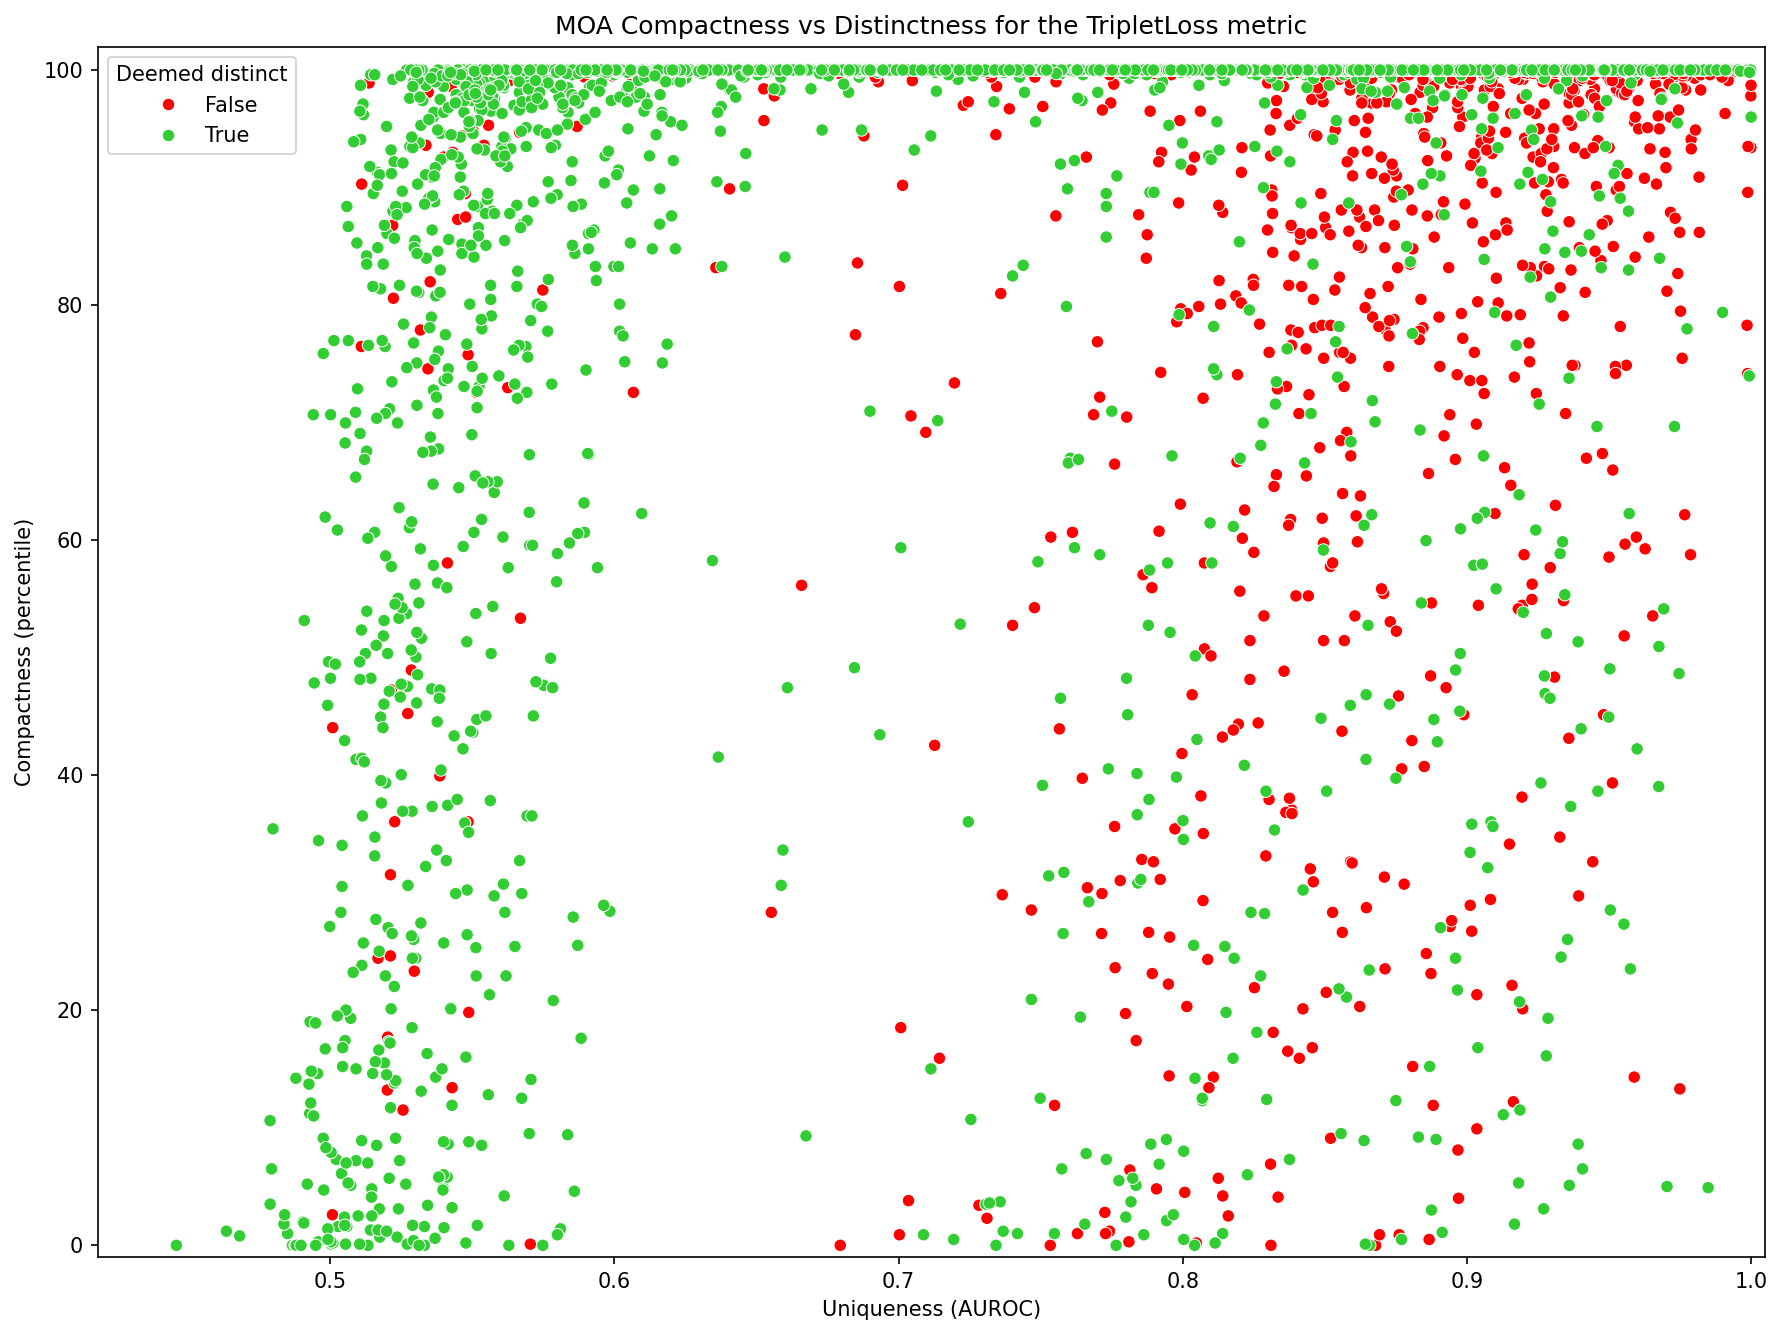

Working on Compactness vs Distinctness plot for the Cosine metric


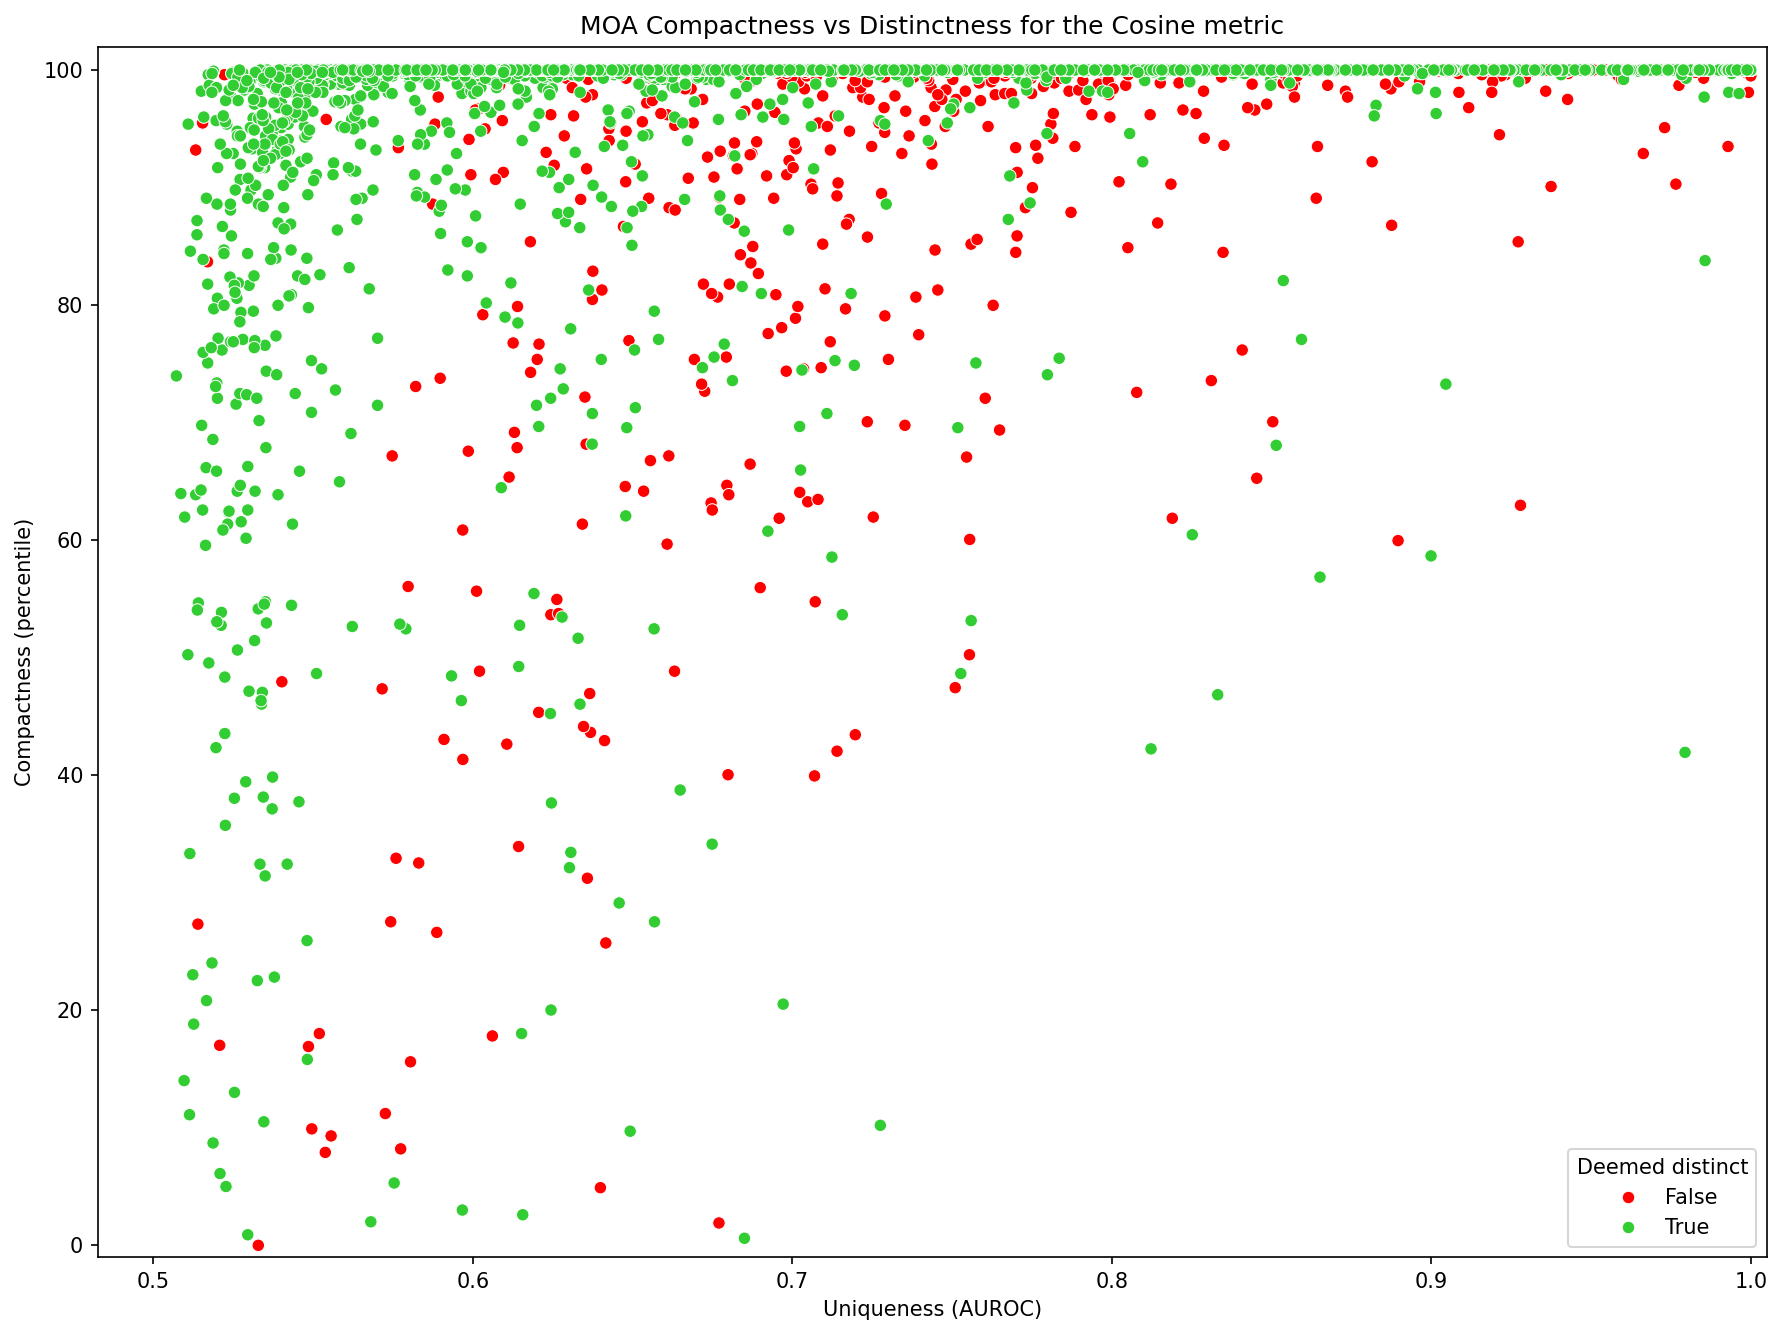

Working on Compactness vs Distinctness plot for the Zhang metric


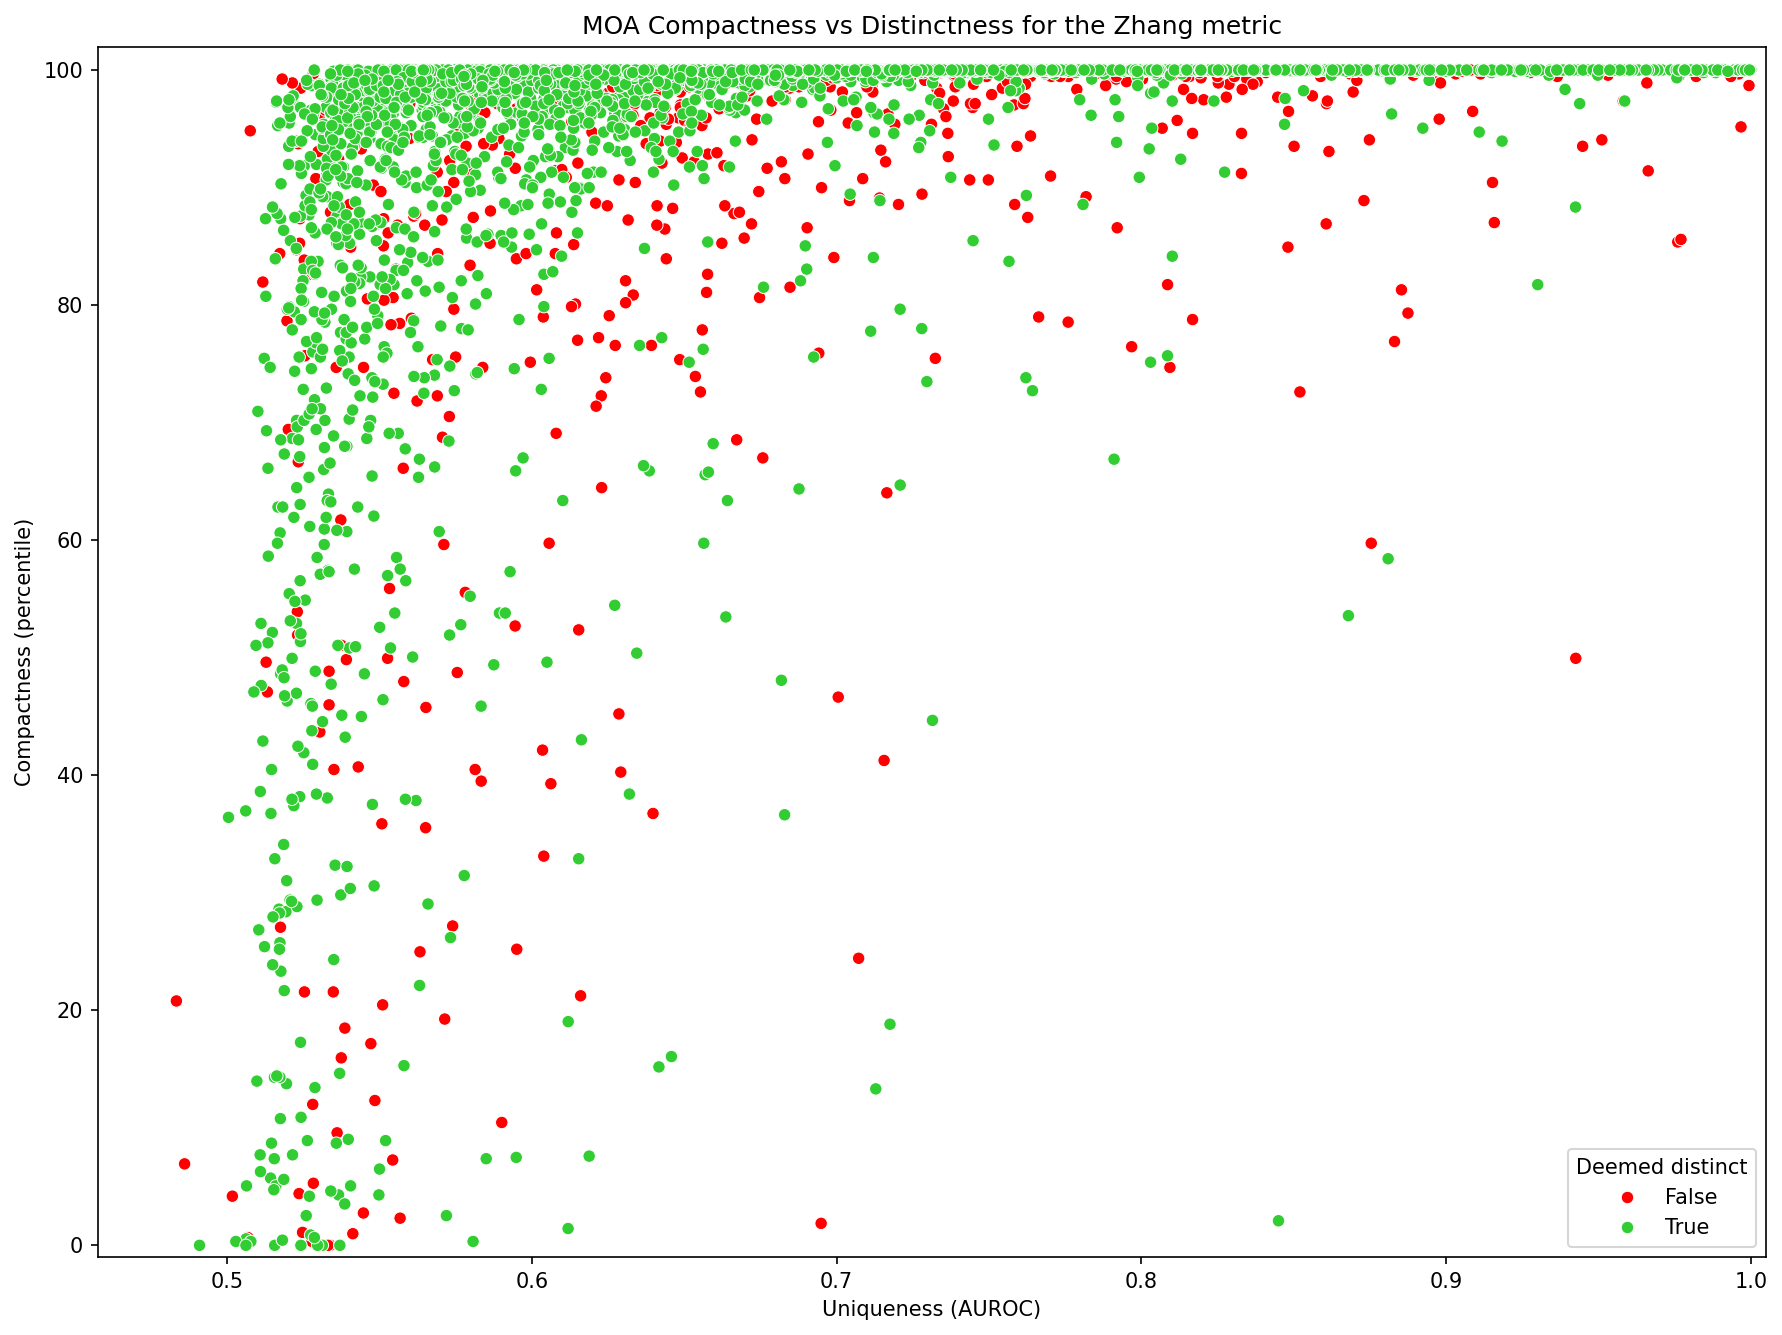

Working on Compactness vs Distinctness plot for the Rank metric


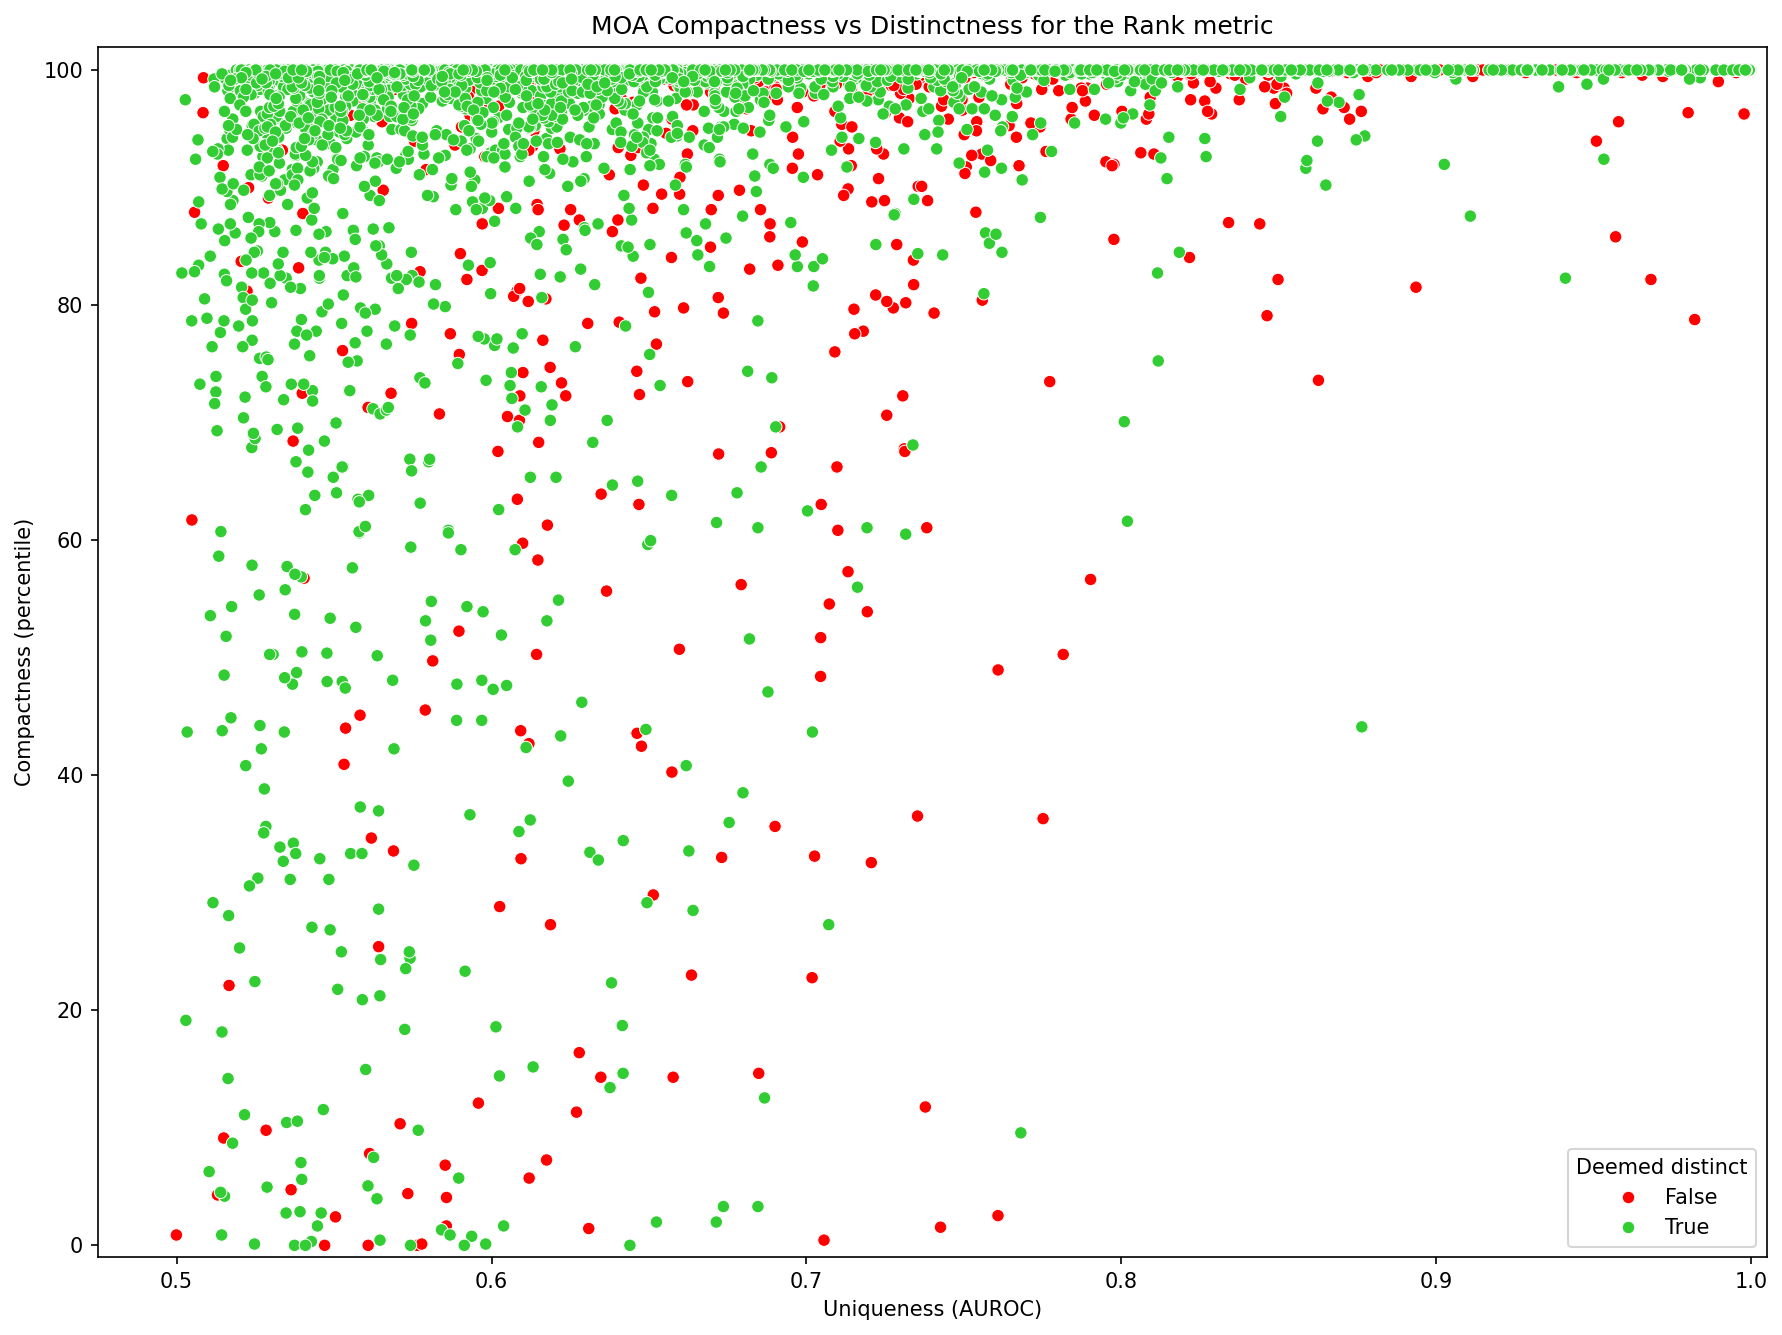

Working on Compactness vs Distinctness plot for the EuclideanPCA metric


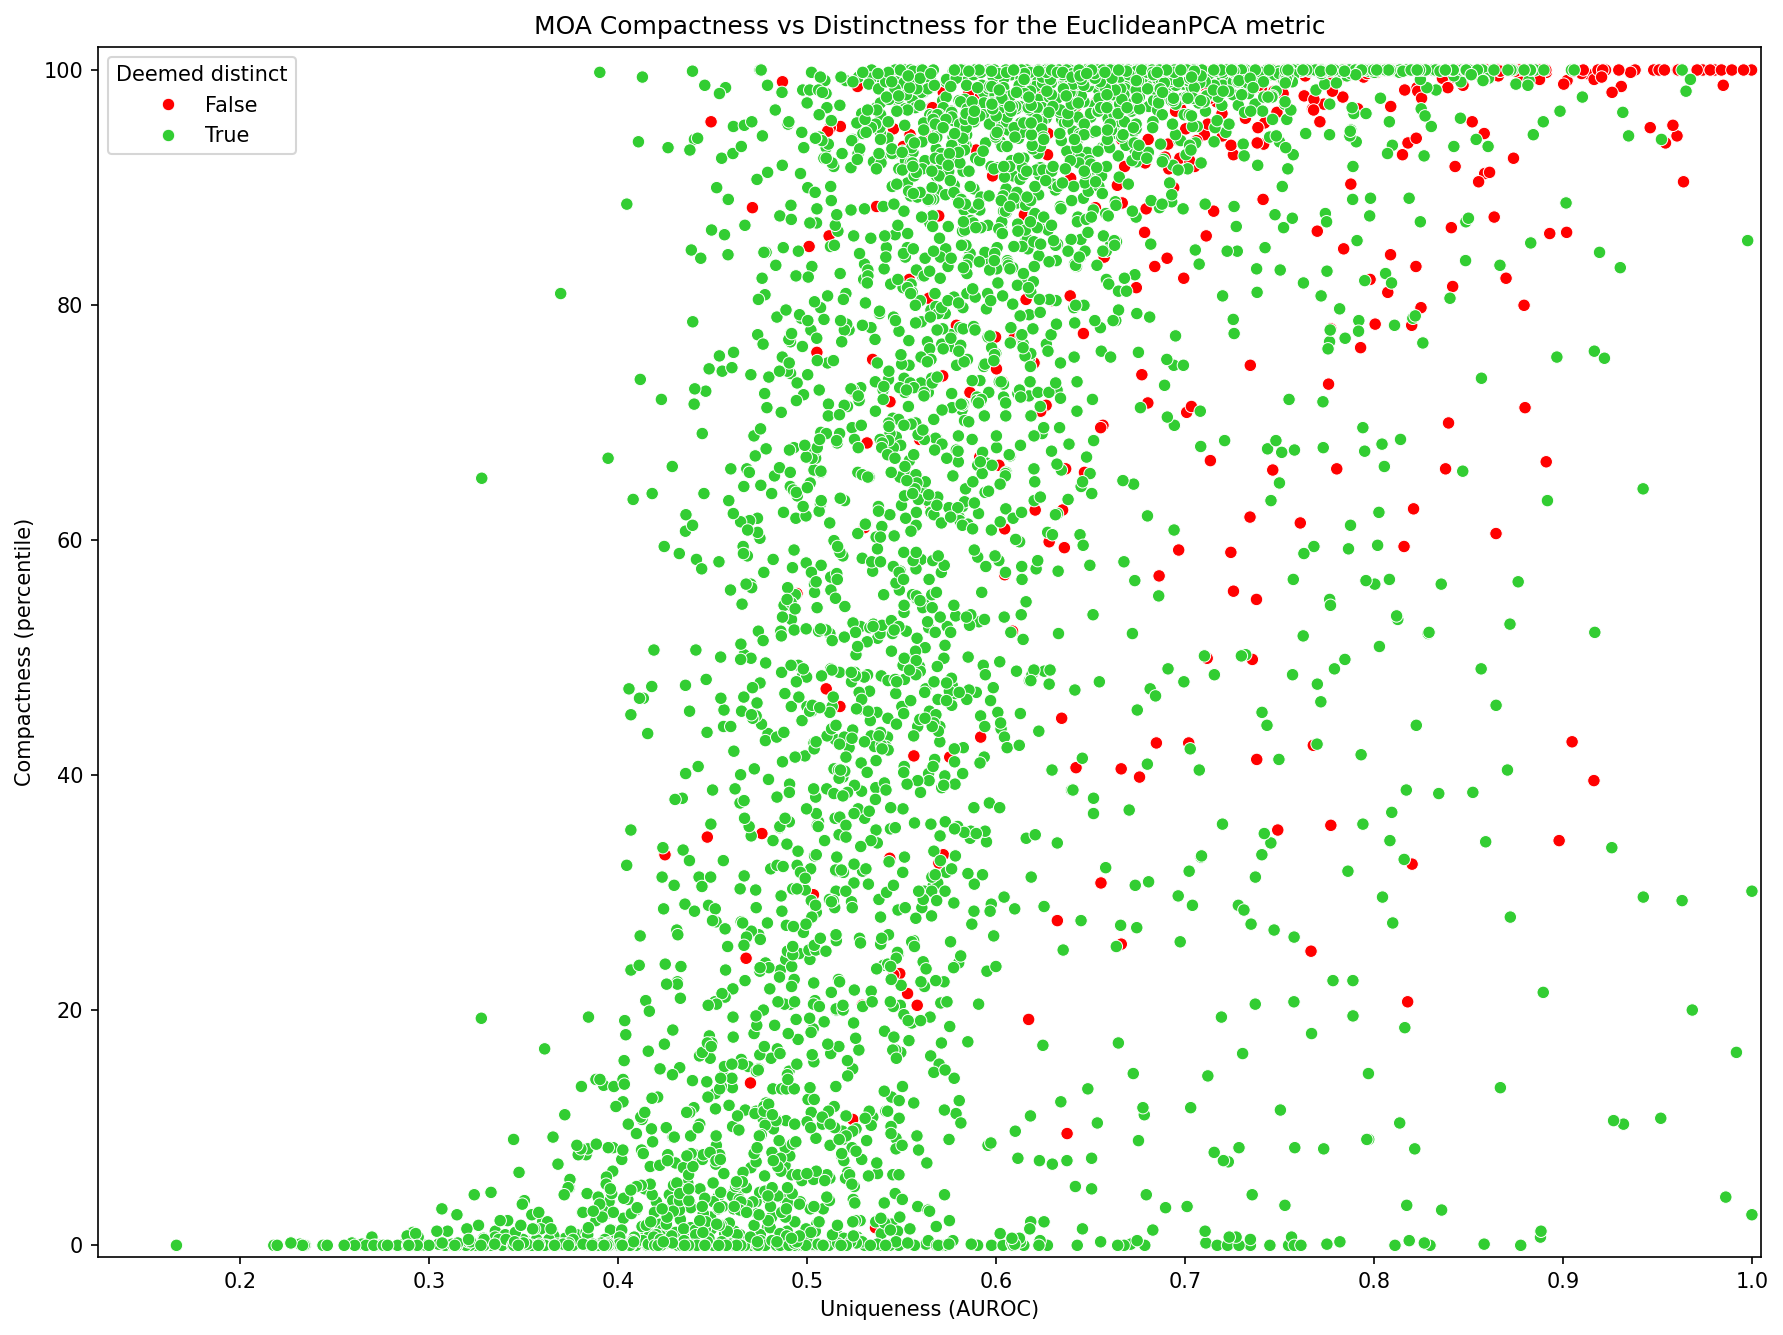

Working on Compactness vs Distinctness plot for the Euclidean metric


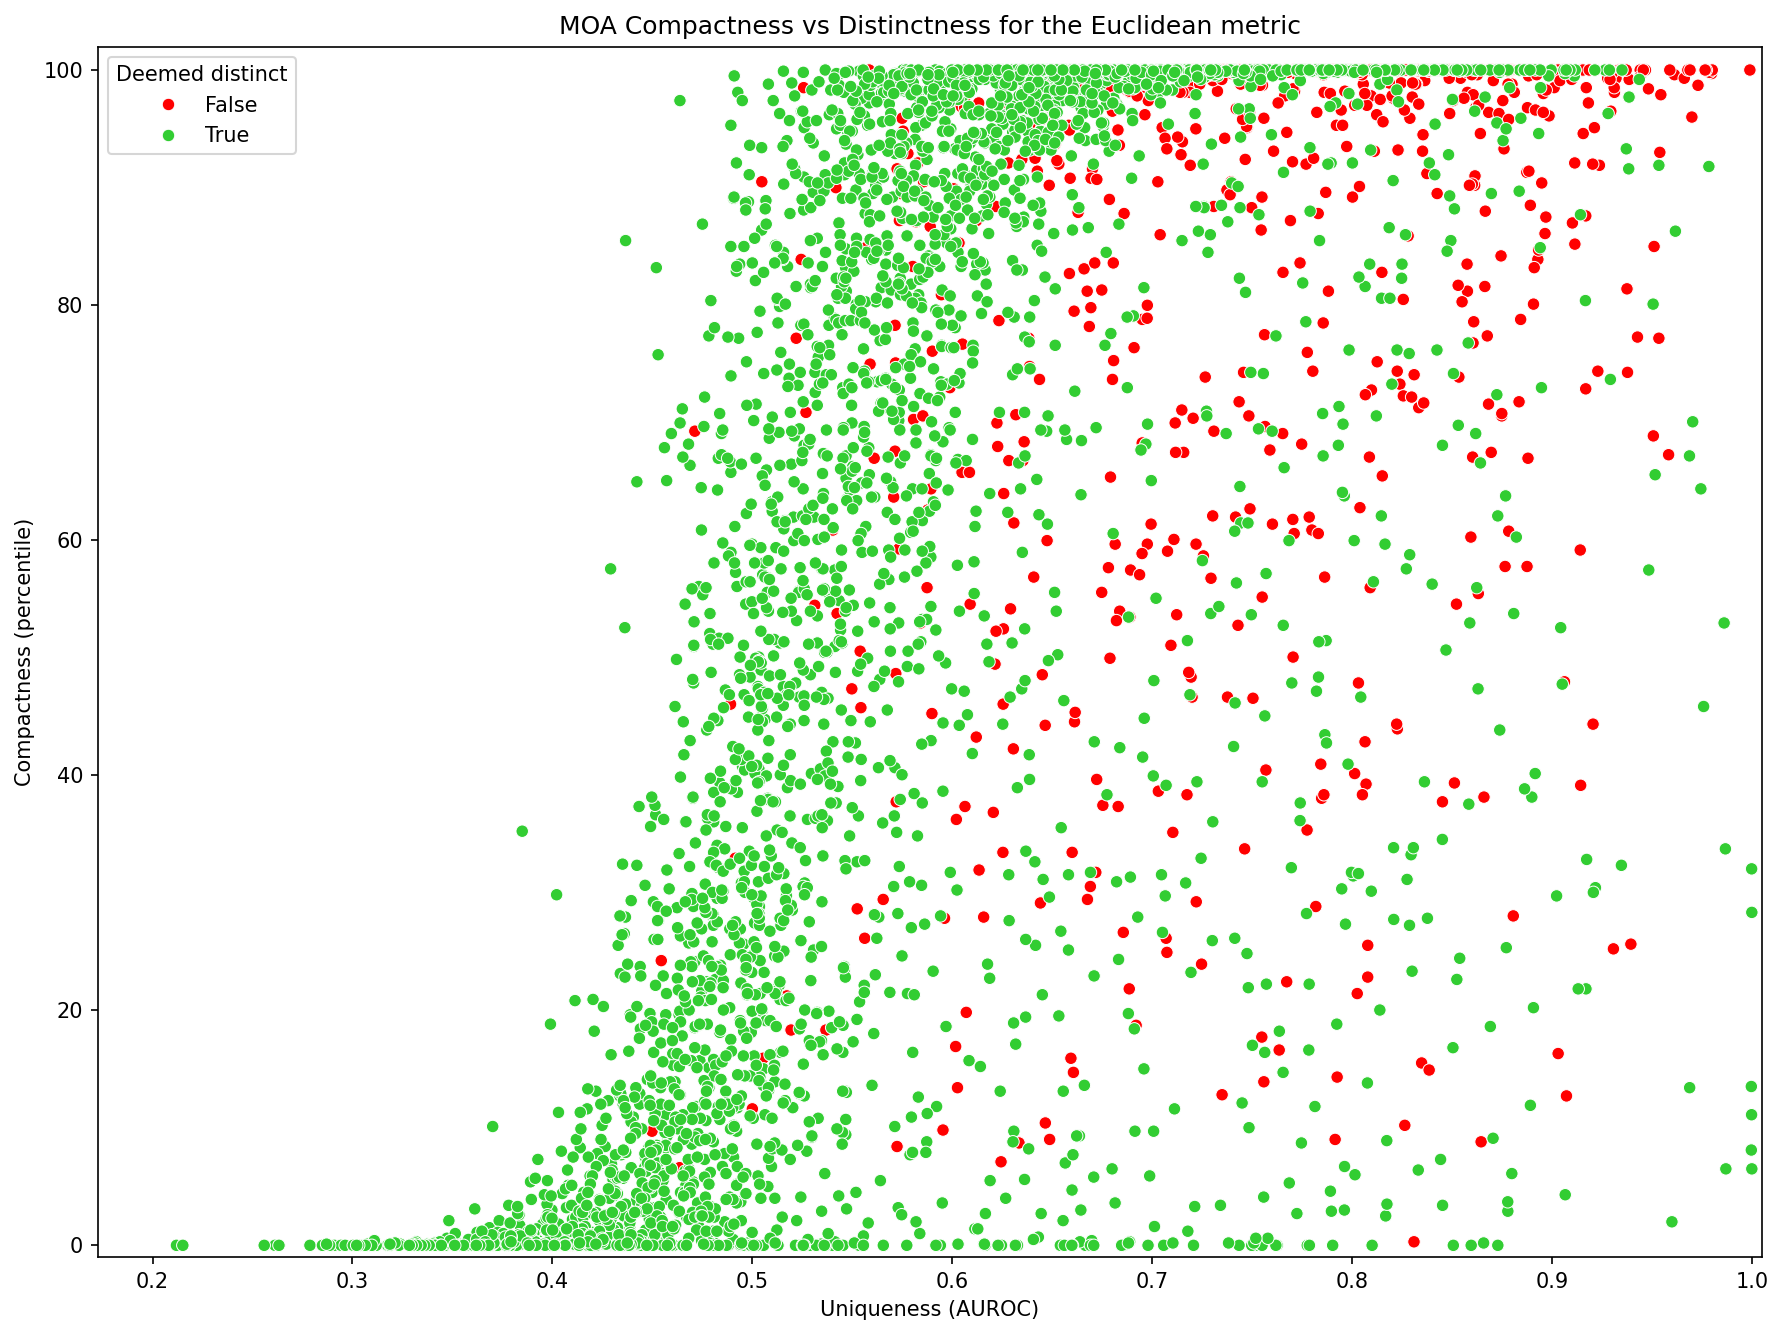

In [2]:
# Plot Distinctness vs AUROC, coloured by Distinctness for the cosine metric
import seaborn as sns
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

metric_name = "Euclidean"
MODEL_NAME = "TripletLoss"
MODEL_IDENTIFIER = "155"

working_dir = Path("working_dir")
eval_data_dir = (
    working_dir / Path("plot_data") / Path(MODEL_NAME) / Path(MODEL_IDENTIFIER)
)
data_dir = eval_data_dir / Path("compactness_vs_distinctness_vs_uniqueness")

for metric_name in [
    "TripletLoss",
    "Cosine",
    "Zhang",
    "Rank",
    "EuclideanPCA",
    "Euclidean",
]:
    print(f"Working on Compactness vs Distinctness plot for the {metric_name} metric")
    metric_performance_df = pd.read_csv(
        data_dir / f"compactness_vs_distinctness_vs_uniqueness_moas_{metric_name}.csv",
        index_col=0,
    )
    metric_performance_df["Deemed distinct"] = metric_performance_df[
        "Distinctness minus_log10_distinctness_pvalue"
    ] > -np.log10(0.05)
    fig, ax = plt.subplots(1, figsize=(12, 9), dpi=150)
    sns.scatterplot(
        metric_performance_df.sort_values(
            "Deemed distinct", key=np.vectorize([False, True].index)
        ),
        x="Uniqueness AUROC",
        y="Compactness percentile",
        hue="Deemed distinct",
        ax=ax,
        palette=["red", "limegreen"],
        hue_order=[False, True],
    )
    ax.set_xlabel("Uniqueness (AUROC)")
    ax.set_ylabel("Compactness (percentile)")
    ax.set_xlim((None, 1.005))
    ax.set_ylim((-1, 102))
    ax.set_title(f"MOA Compactness vs Distinctness for the {metric_name} metric")
    plt.tight_layout()
    ax.set_facecolor("white")
    plt.savefig(data_dir / f"plot_compactness_vs_uniqueness_moas_{metric_name}.svg")
    plt.savefig(data_dir / f"plot_compactness_vs_uniqueness_moas_{metric_name}.png", dpi=150)
    plt.show()

# Investigate interesting MOAs from EuclideanPCA metric scatter plots

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

metric_name = 'EuclideanPCA'

MODEL_NAME = "TripletLoss"
MODEL_IDENTIFIER = "155"
working_dir = Path("working_dir")
eval_data_dir = working_dir / Path("plot_data") / Path(MODEL_NAME) / Path(MODEL_IDENTIFIER)
data_dir = eval_data_dir / Path("compactness_vs_distinctness_vs_uniqueness")


metric_performance_df = pd.read_csv(
        data_dir / f"compactness_vs_distinctness_vs_uniqueness_moas_{metric_name}.csv",
        index_col=0,
    )


# Top left - low uniquness, high compactness
row_lu_hc=metric_performance_df.query("`Compactness percentile` > 99").sort_values("Uniqueness AUROC", ascending=True).iloc[0]
display("Top left", row_lu_hc)
row_hu_hc=metric_performance_df.query("`Uniqueness AUROC`>0.99").sort_values("Compactness percentile", ascending=False).iloc[0]
display("Top right", row_hu_hc)
row_hu_lc=metric_performance_df.query("`Uniqueness AUROC`>0.99").sort_values("Compactness percentile", ascending=True).iloc[0]
display("Bottom right", row_hu_lc)
row_lu_lc=metric_performance_df.sort_values(['Uniqueness AUROC', "Compactness percentile"], ascending=[True, True]).iloc[0]
display("Bottom left", row_lu_lc)


# This function will be used later to apply transformers
def apply_transformer(
    transformer_class, transformer_init_args, df, features_in, features_out
):
    transformer = transformer_class(**transformer_init_args)
    transformed_data = transformer.fit_transform(df[features_in])
    if isinstance(features_out, str):
        if features_out == "PC":
            features_out = [
                f"PC_1 ({transformer.explained_variance_ratio_[0]:.3f} f.e.v)",
                f"PC_2 ({transformer.explained_variance_ratio_[1]:.3f} f.e.v)",
            ]
        else:
            features_out = [
                f"{features_out}_{i}" for i in range(1, transformed_data.shape[1] + 1)
            ]
    return (
        pd.concat(
            [
                df,
                pd.DataFrame(
                    data=transformed_data,
                    columns=features_out,
                    index=df.index,
                ),
            ],
            axis=1,
        ),
        features_out,
    )

'Top left'

Cell line                                                HUES3
TreatmentMOA                                    EGFR inhibitor
Compactness percentile                                 99.7998
Distinctness minus_log10_distinctness_pvalue               4.0
Uniqueness AUROC                                      0.390231
Name: ('HUES3', 'EGFR inhibitor'), dtype: object

'Top right'

Cell line                                              HS578T
TreatmentMOA                                    SRC inhibitor
Compactness percentile                                  100.0
Distinctness minus_log10_distinctness_pvalue         0.132886
Uniqueness AUROC                                     0.999809
Name: ('HS578T', 'SRC inhibitor'), dtype: object

'Bottom right'

Cell line                                                      NPC.CAS9
TreatmentMOA                                    topoisomerase inhibitor
Compactness percentile                                         2.602603
Distinctness minus_log10_distinctness_pvalue                   3.122544
Uniqueness AUROC                                                    1.0
Name: ('NPC.CAS9', 'topoisomerase inhibitor'), dtype: object

'Bottom left'

Cell line                                                PC3
TreatmentMOA                                    TRPV agonist
Compactness percentile                                   0.0
Distinctness minus_log10_distinctness_pvalue             4.0
Uniqueness AUROC                                    0.166167
Name: ('PC3', 'TRPV agonist'), dtype: object

Next, use grep in the form of :
```bash
grep HUES3 working_dir/plot_data/TripletLoss/511/permutationtest_moas/*Euclidean*.csv | grep "'EGFR inhibitor'"| head -n1 | xargs basename | cut -f3,4 -d_
grep HS578T working_dir/plot_data/TripletLoss/511/permutationtest_moas/*Euclidean*.csv | grep "'SRC inhibitor'"| head -n1 | xargs basename | cut -f3,4 -d_
grep NPC.CAS9 working_dir/plot_data/TripletLoss/511/permutationtest_moas/*Euclidean*.csv | grep "'topoisomerase inhibitor'"| head -n1 | xargs basename | cut -f3,4 -d_
grep PC3 working_dir/plot_data/TripletLoss/511/permutationtest_moas/*Euclidean*.csv | grep "'TRPV agonist'"| head -n1 | xargs basename | cut -f3,4 -d_
```
To find out which split each interesting point came from and record as below

In [4]:
row_lu_hc['cell line split'] = 4
row_lu_hc['moa split'] = 4
row_lu_hc['location'] = "top left"


row_hu_hc['cell line split'] = 3
row_hu_hc['moa split'] = 2
row_hu_hc['location'] = "top right"

row_hu_lc['cell line split'] = 2
row_hu_lc['moa split'] = 2
row_hu_lc['location'] = "bottom right"

row_lu_lc['cell line split'] = 4
row_lu_lc['moa split'] = 5
row_lu_lc['location'] = 'bottom left'

And plot everything:

Loading fitted standard scaler and PCA found in split json dir (working_dir/split_data/stdscaler_and_pca.pkl)


/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


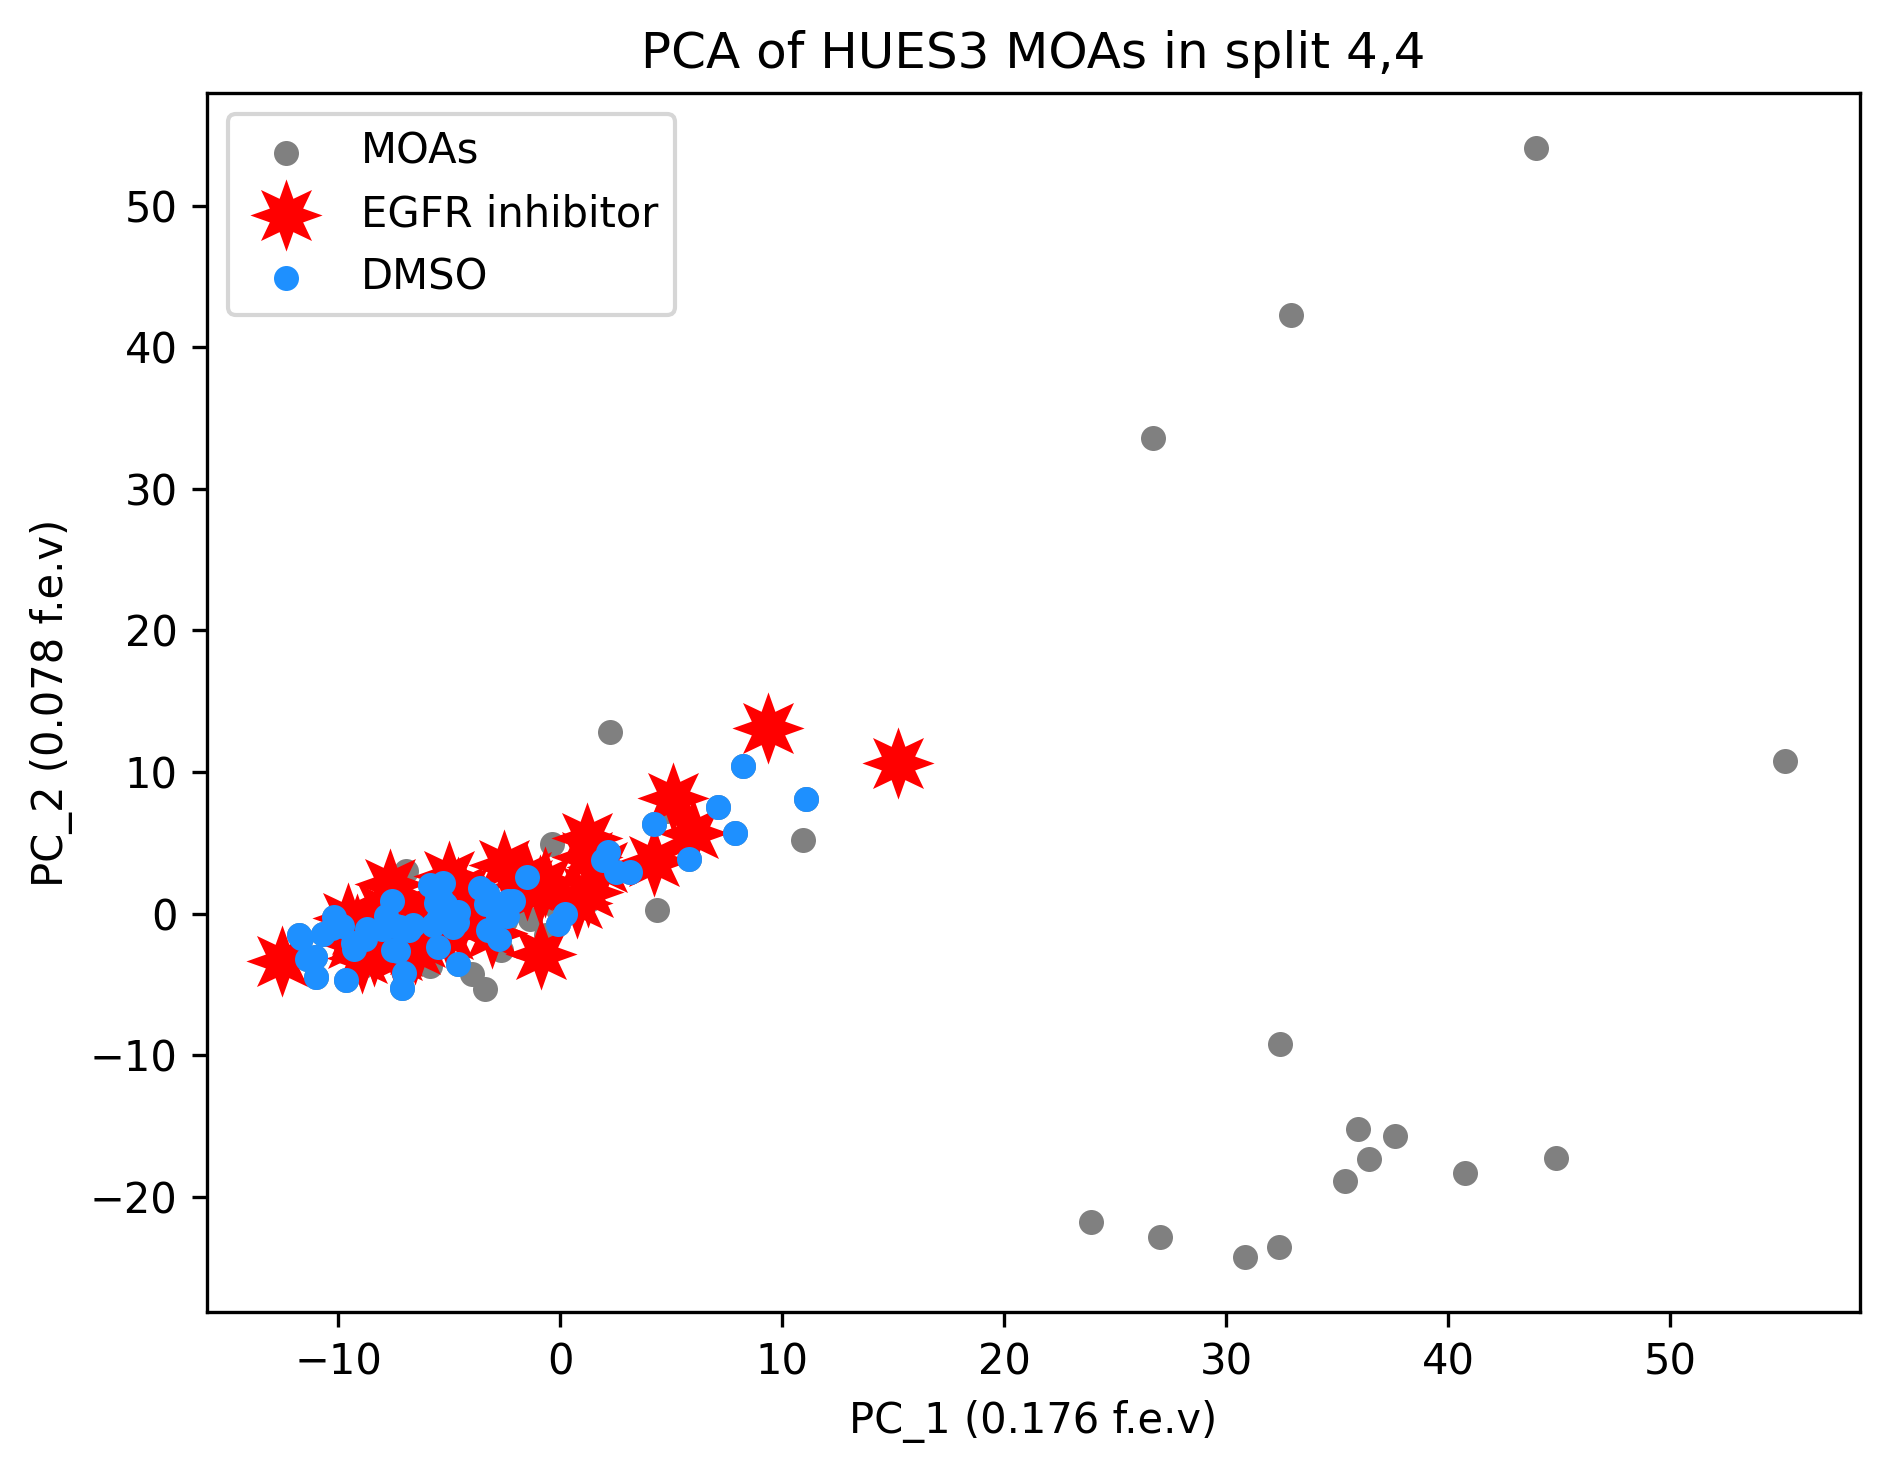

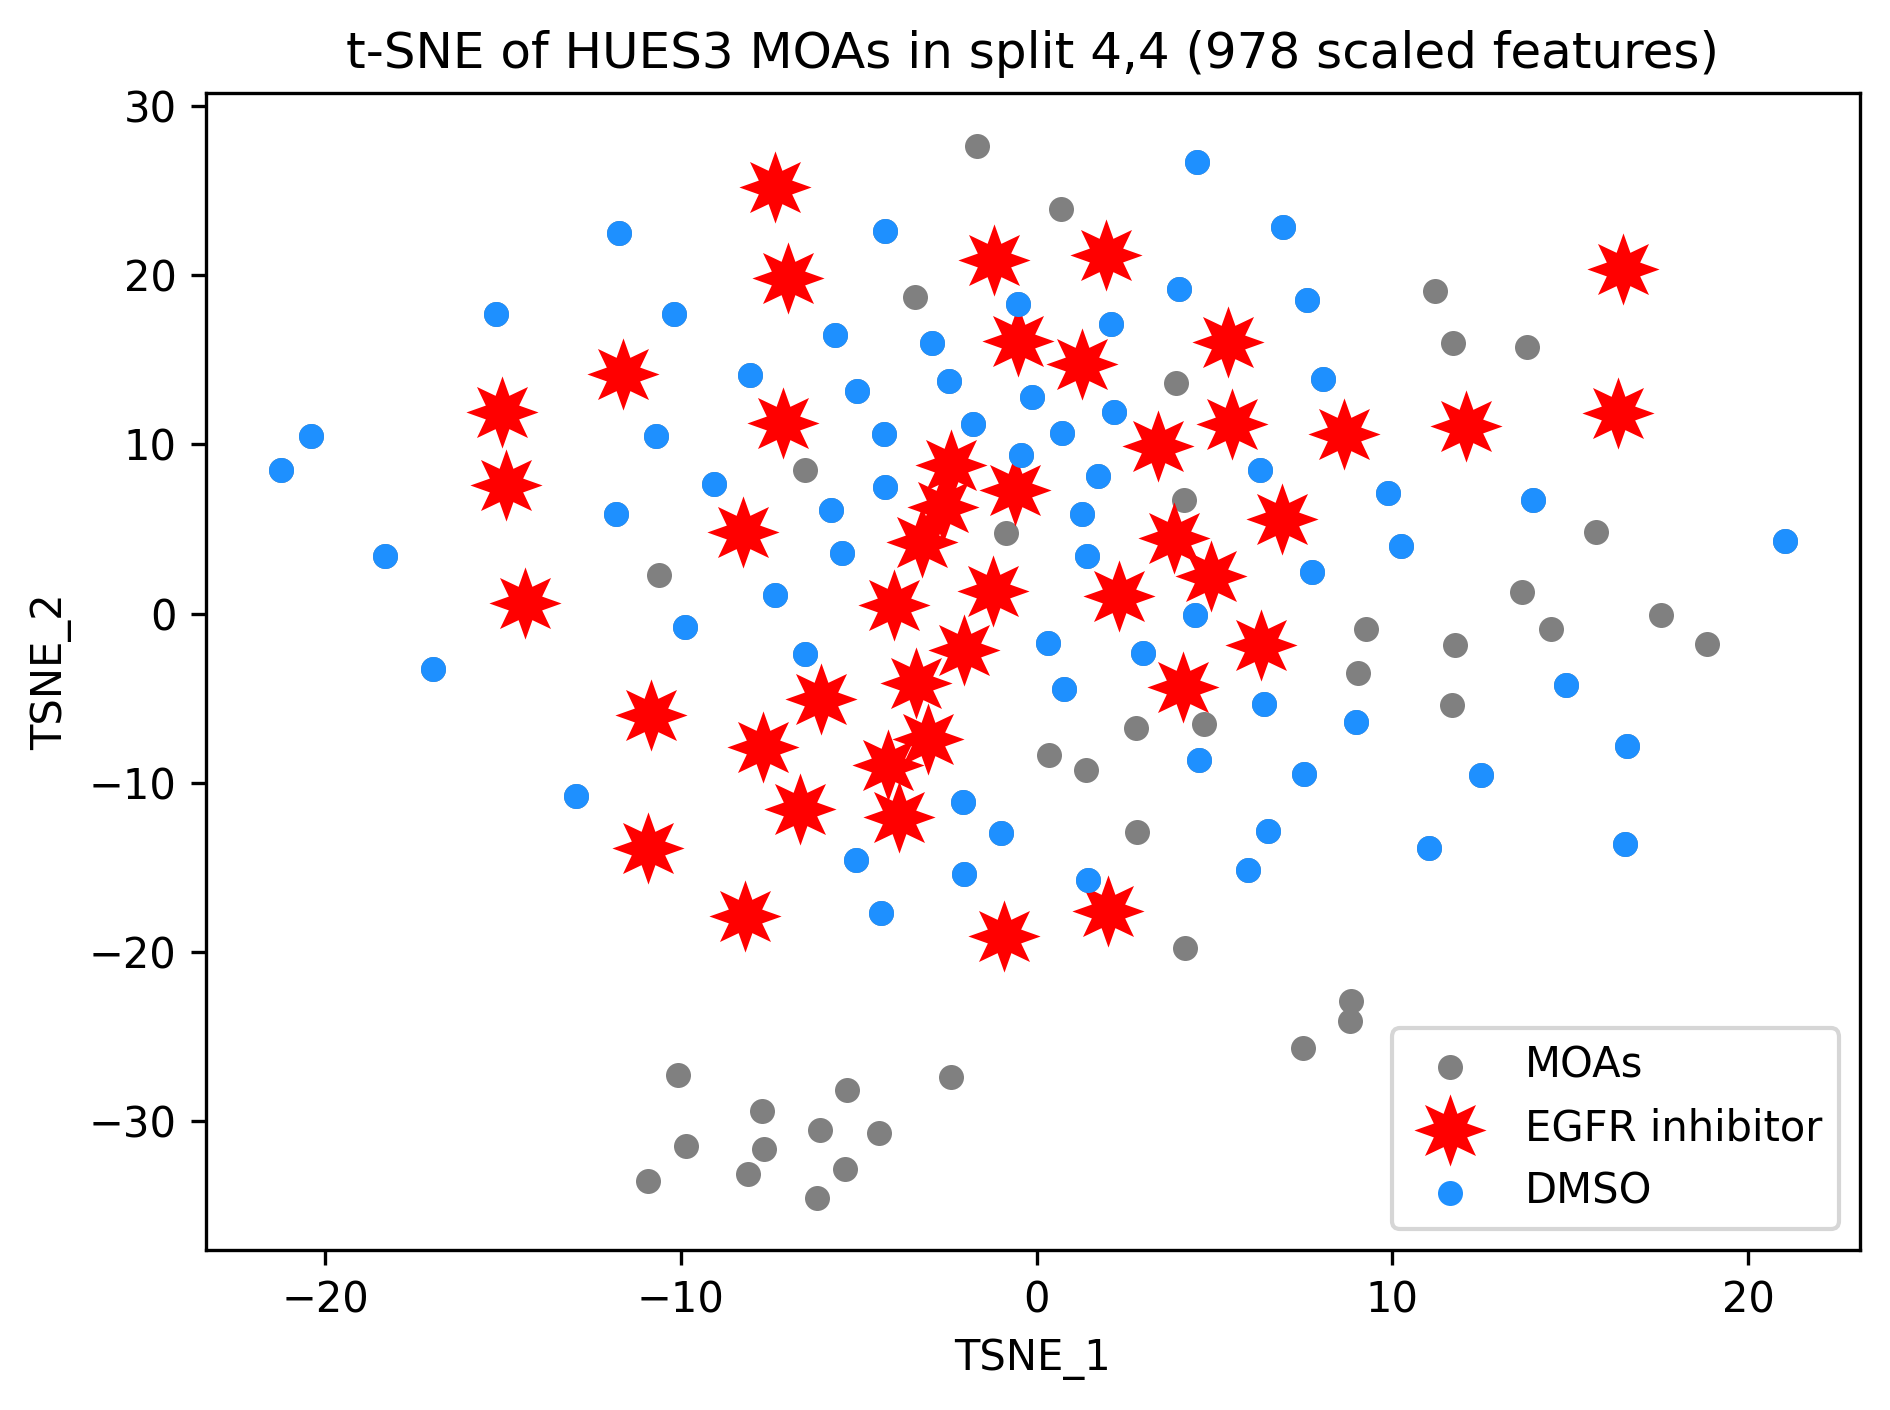

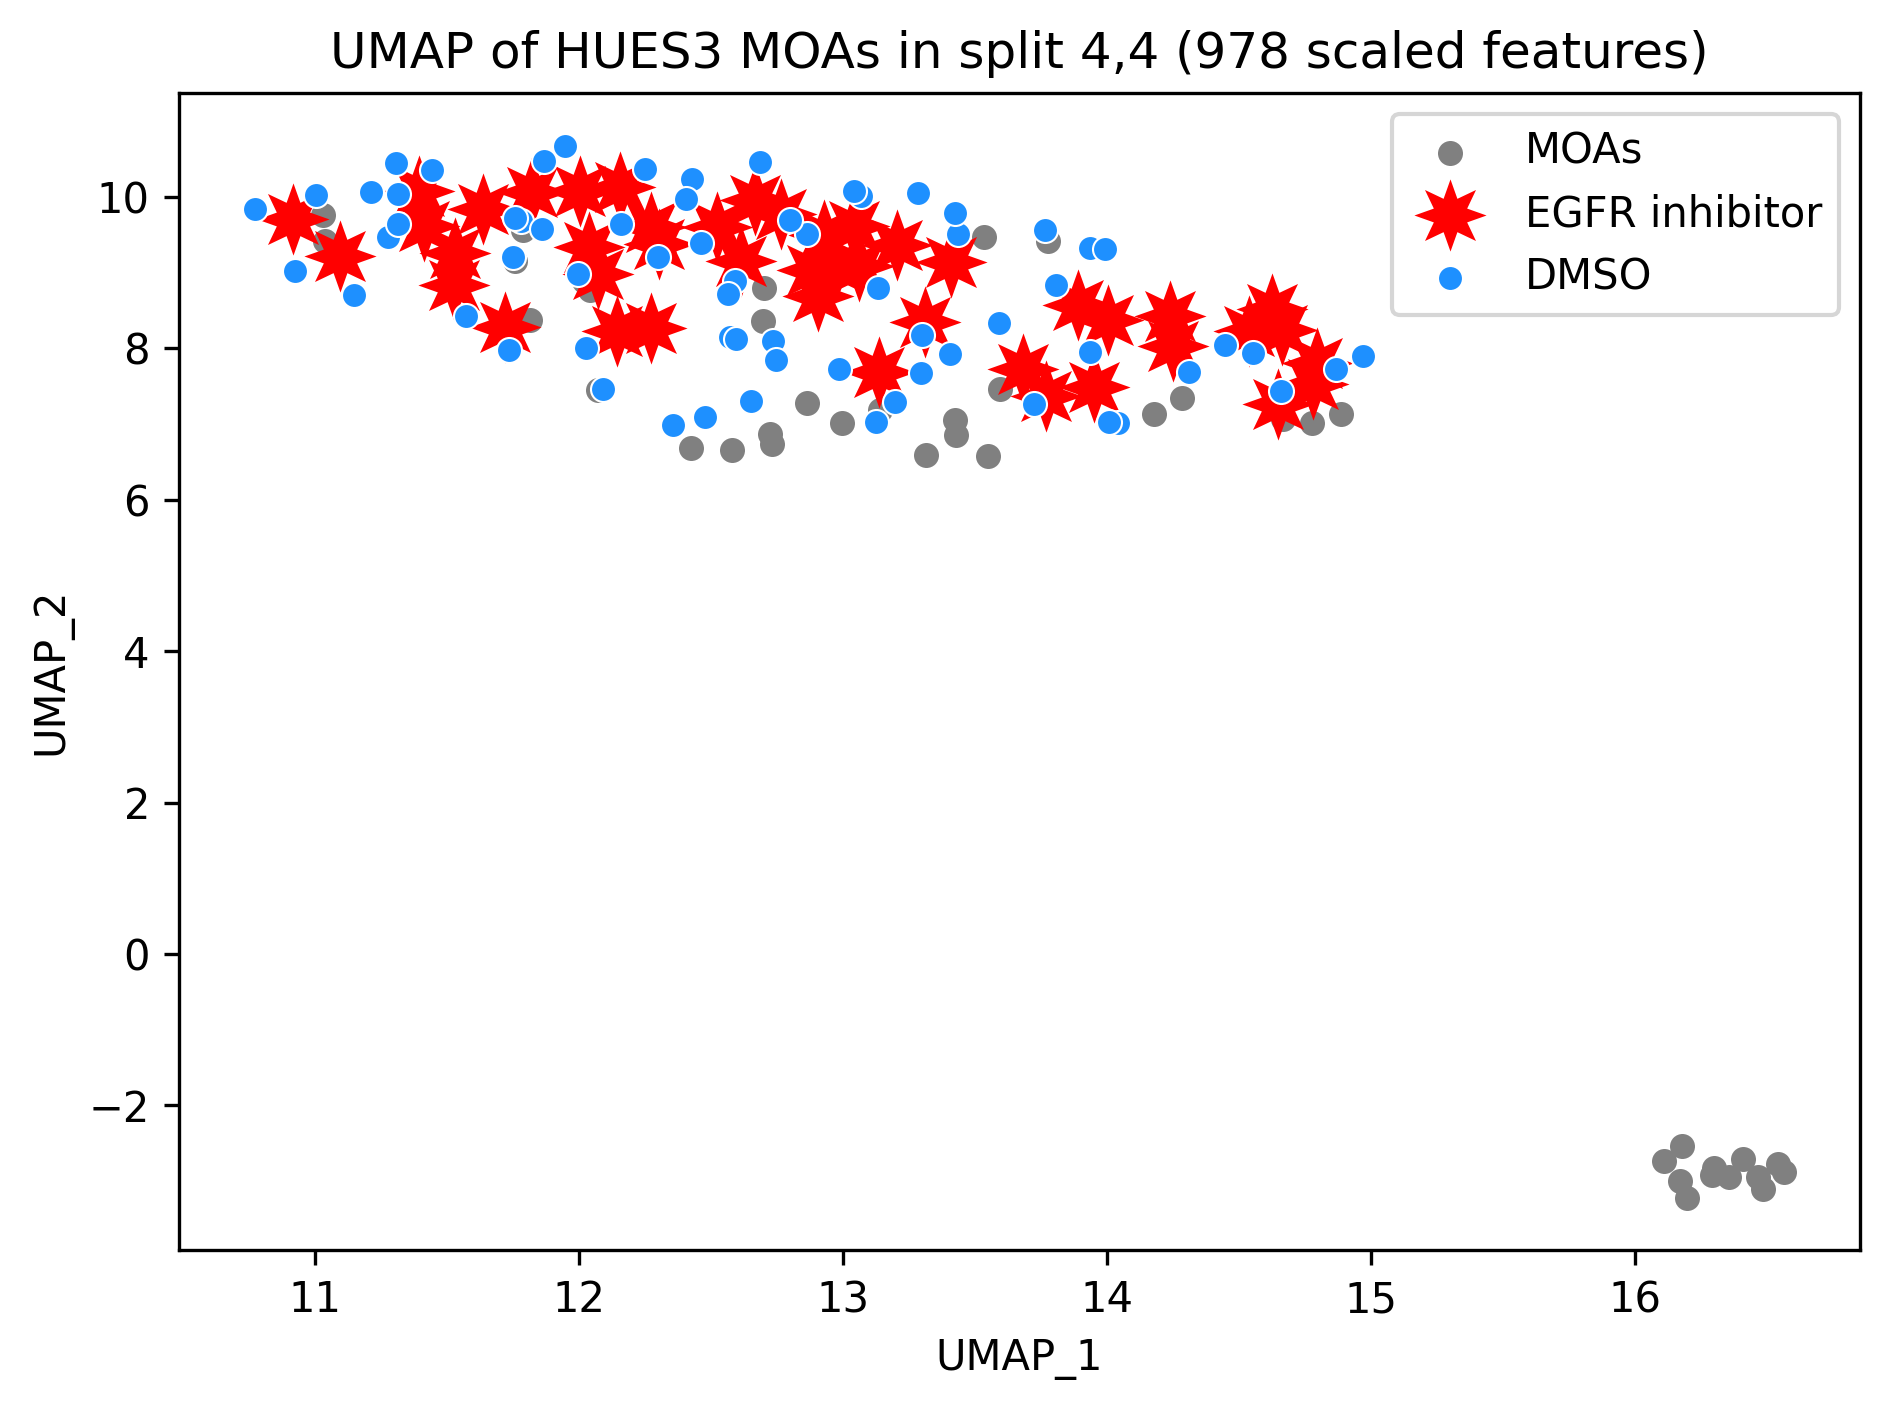

Loading fitted standard scaler and PCA found in split json dir (working_dir/split_data/stdscaler_and_pca.pkl)


/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


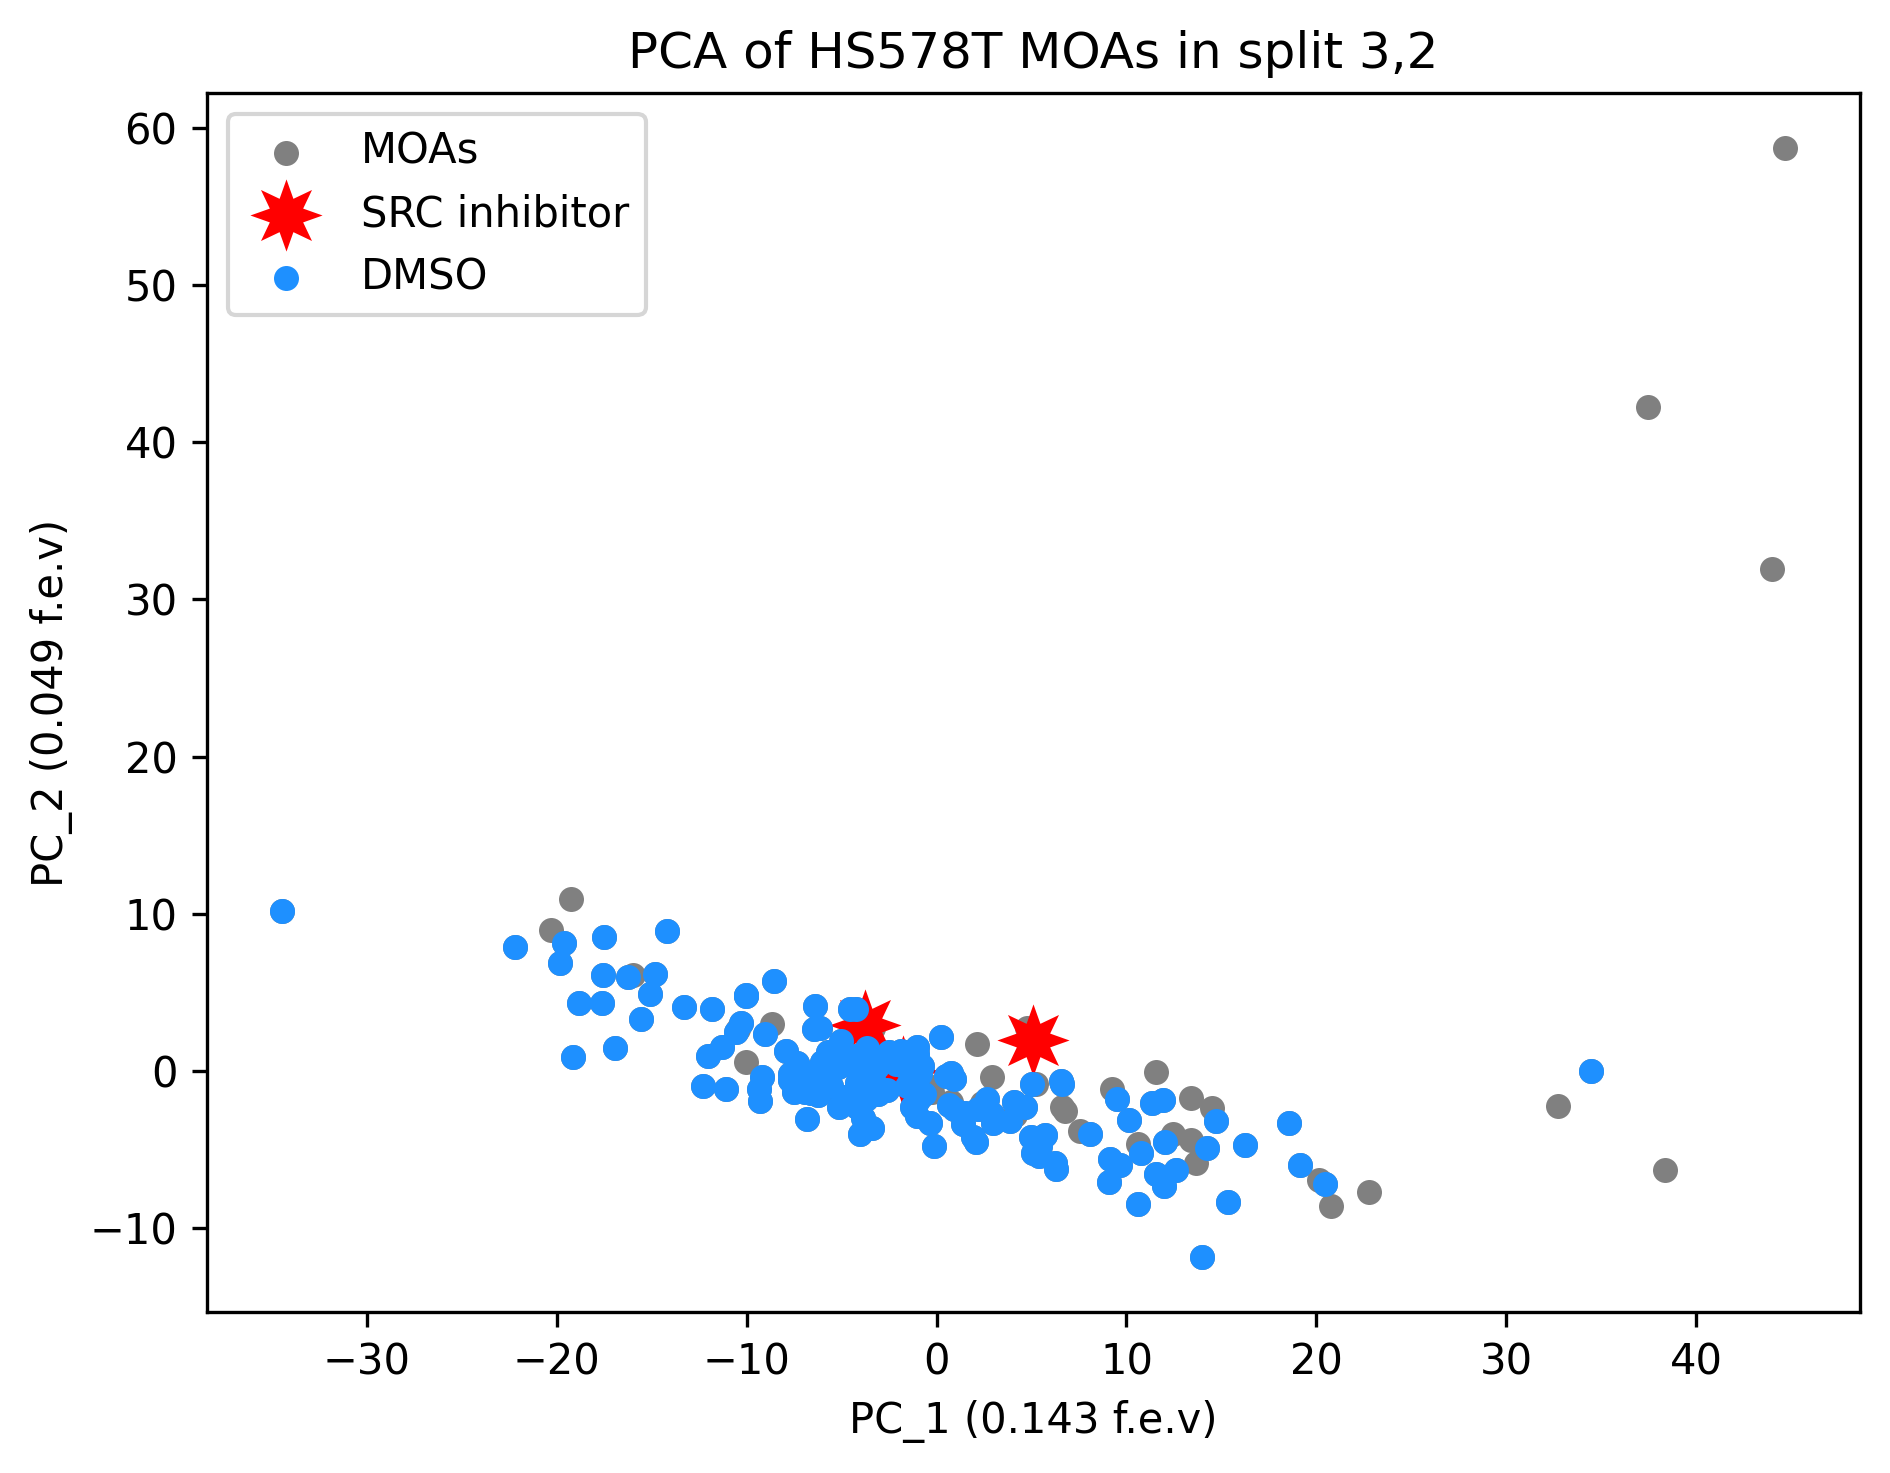

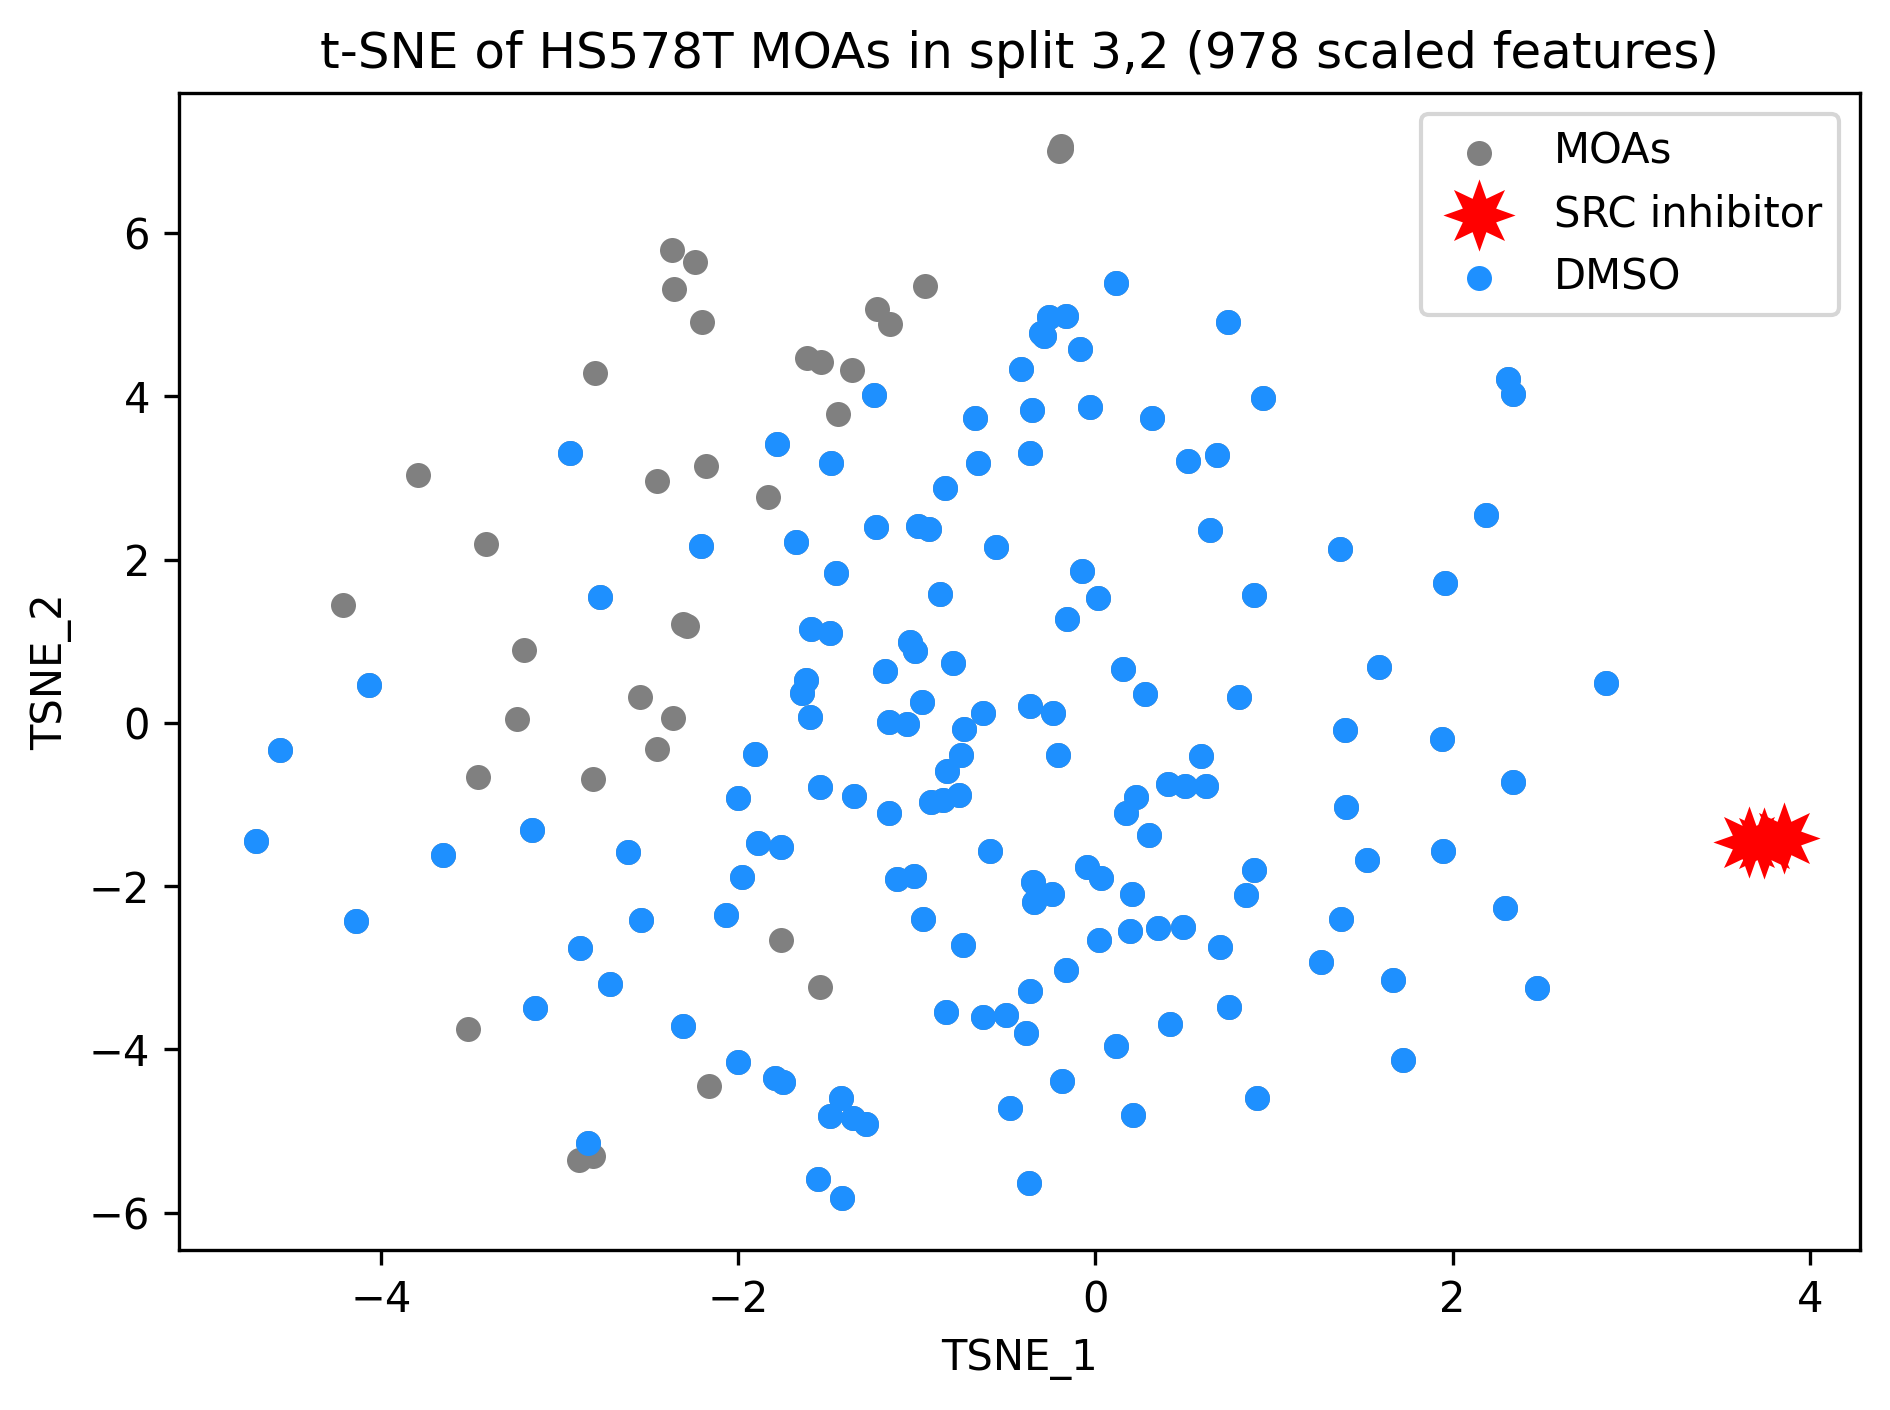

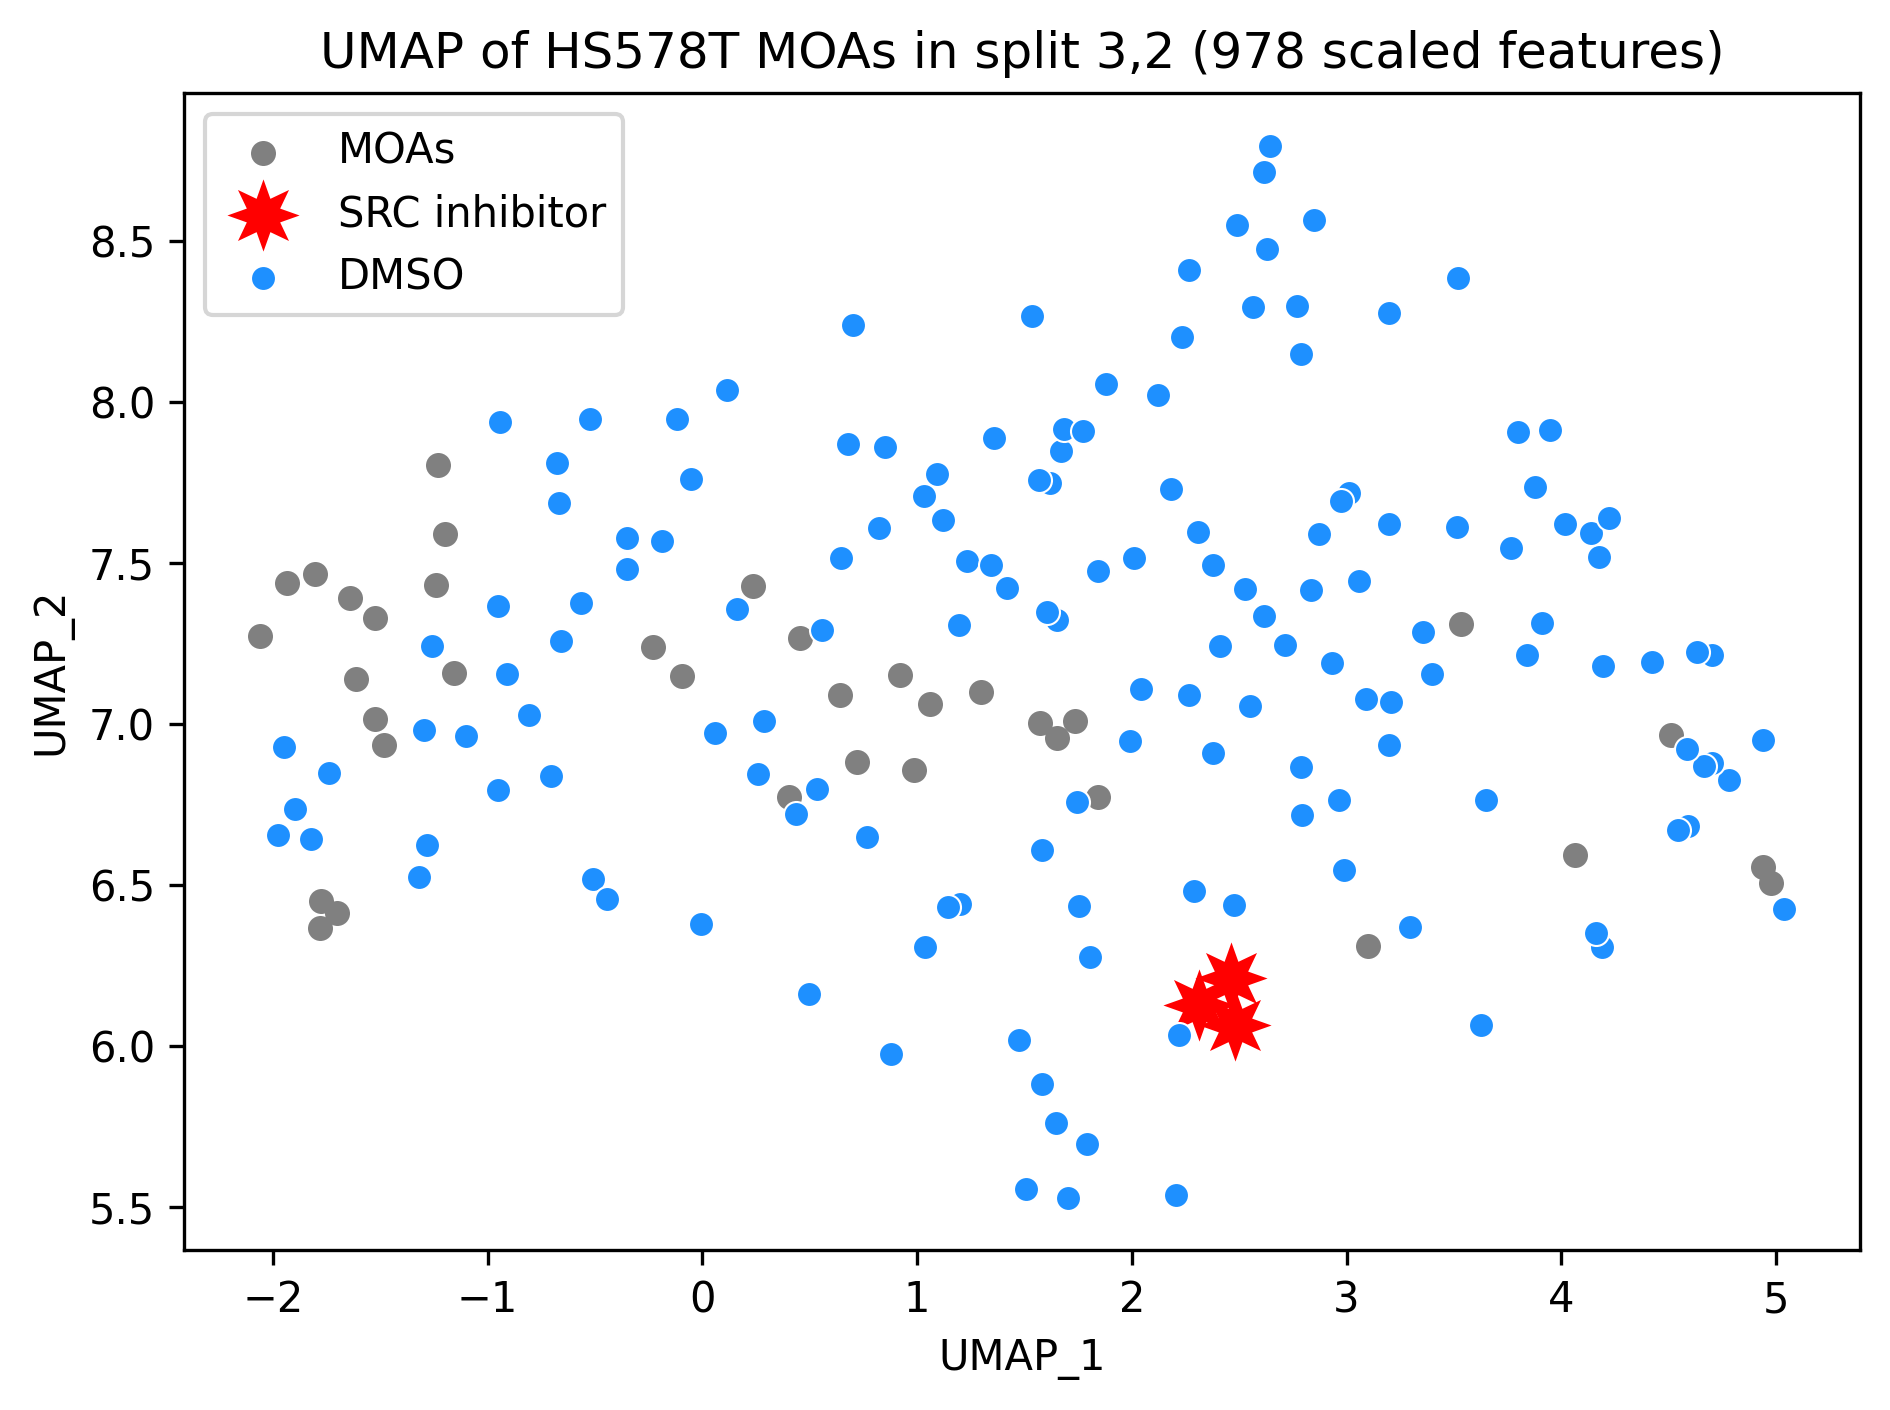

Loading fitted standard scaler and PCA found in split json dir (working_dir/split_data/stdscaler_and_pca.pkl)


/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


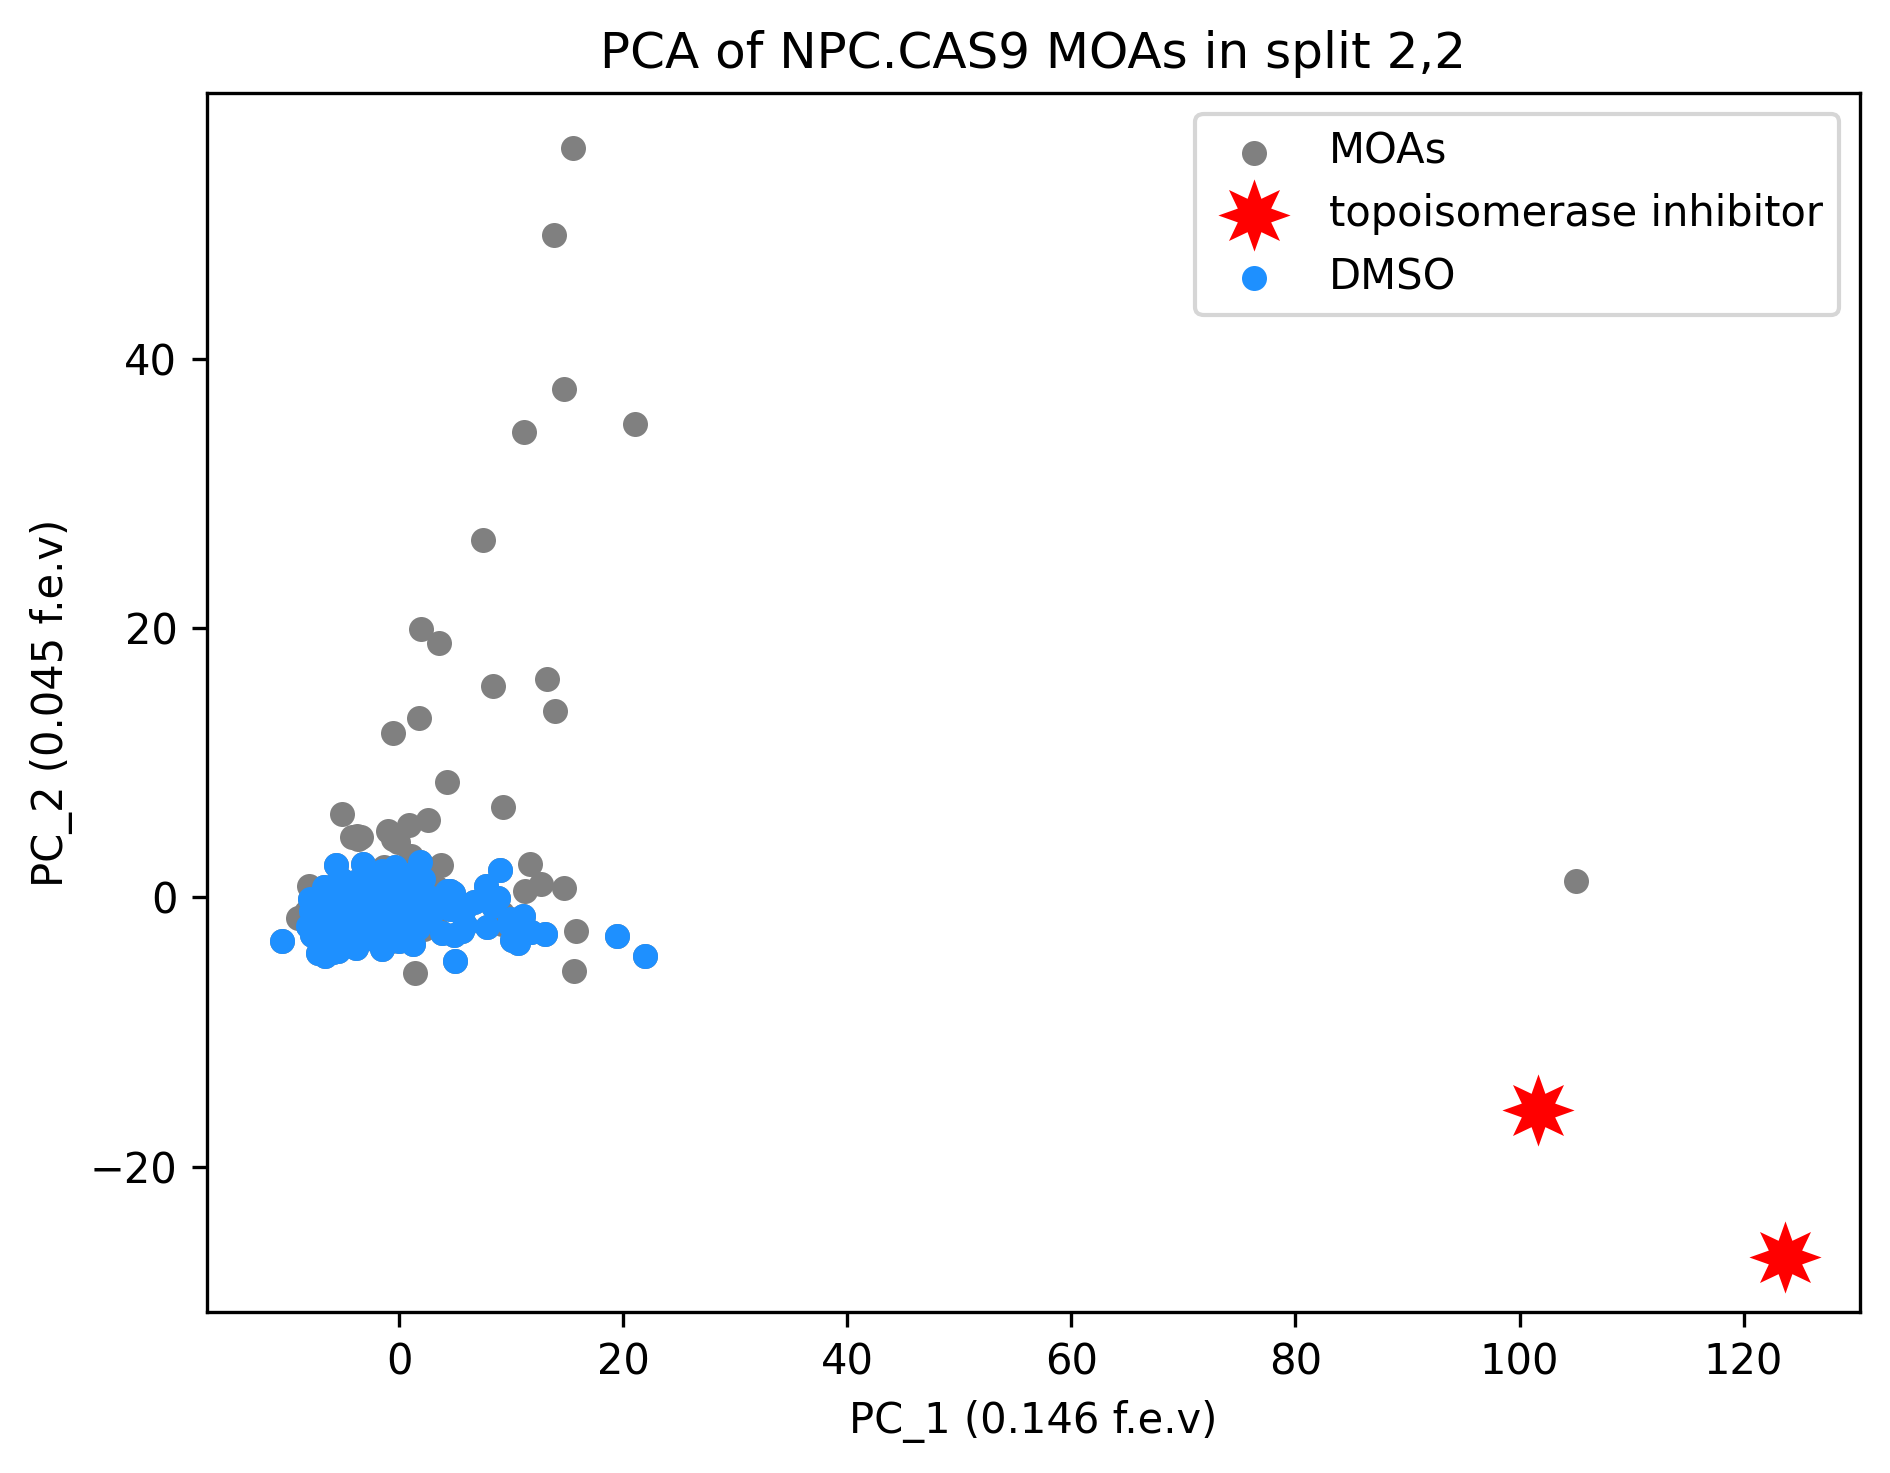

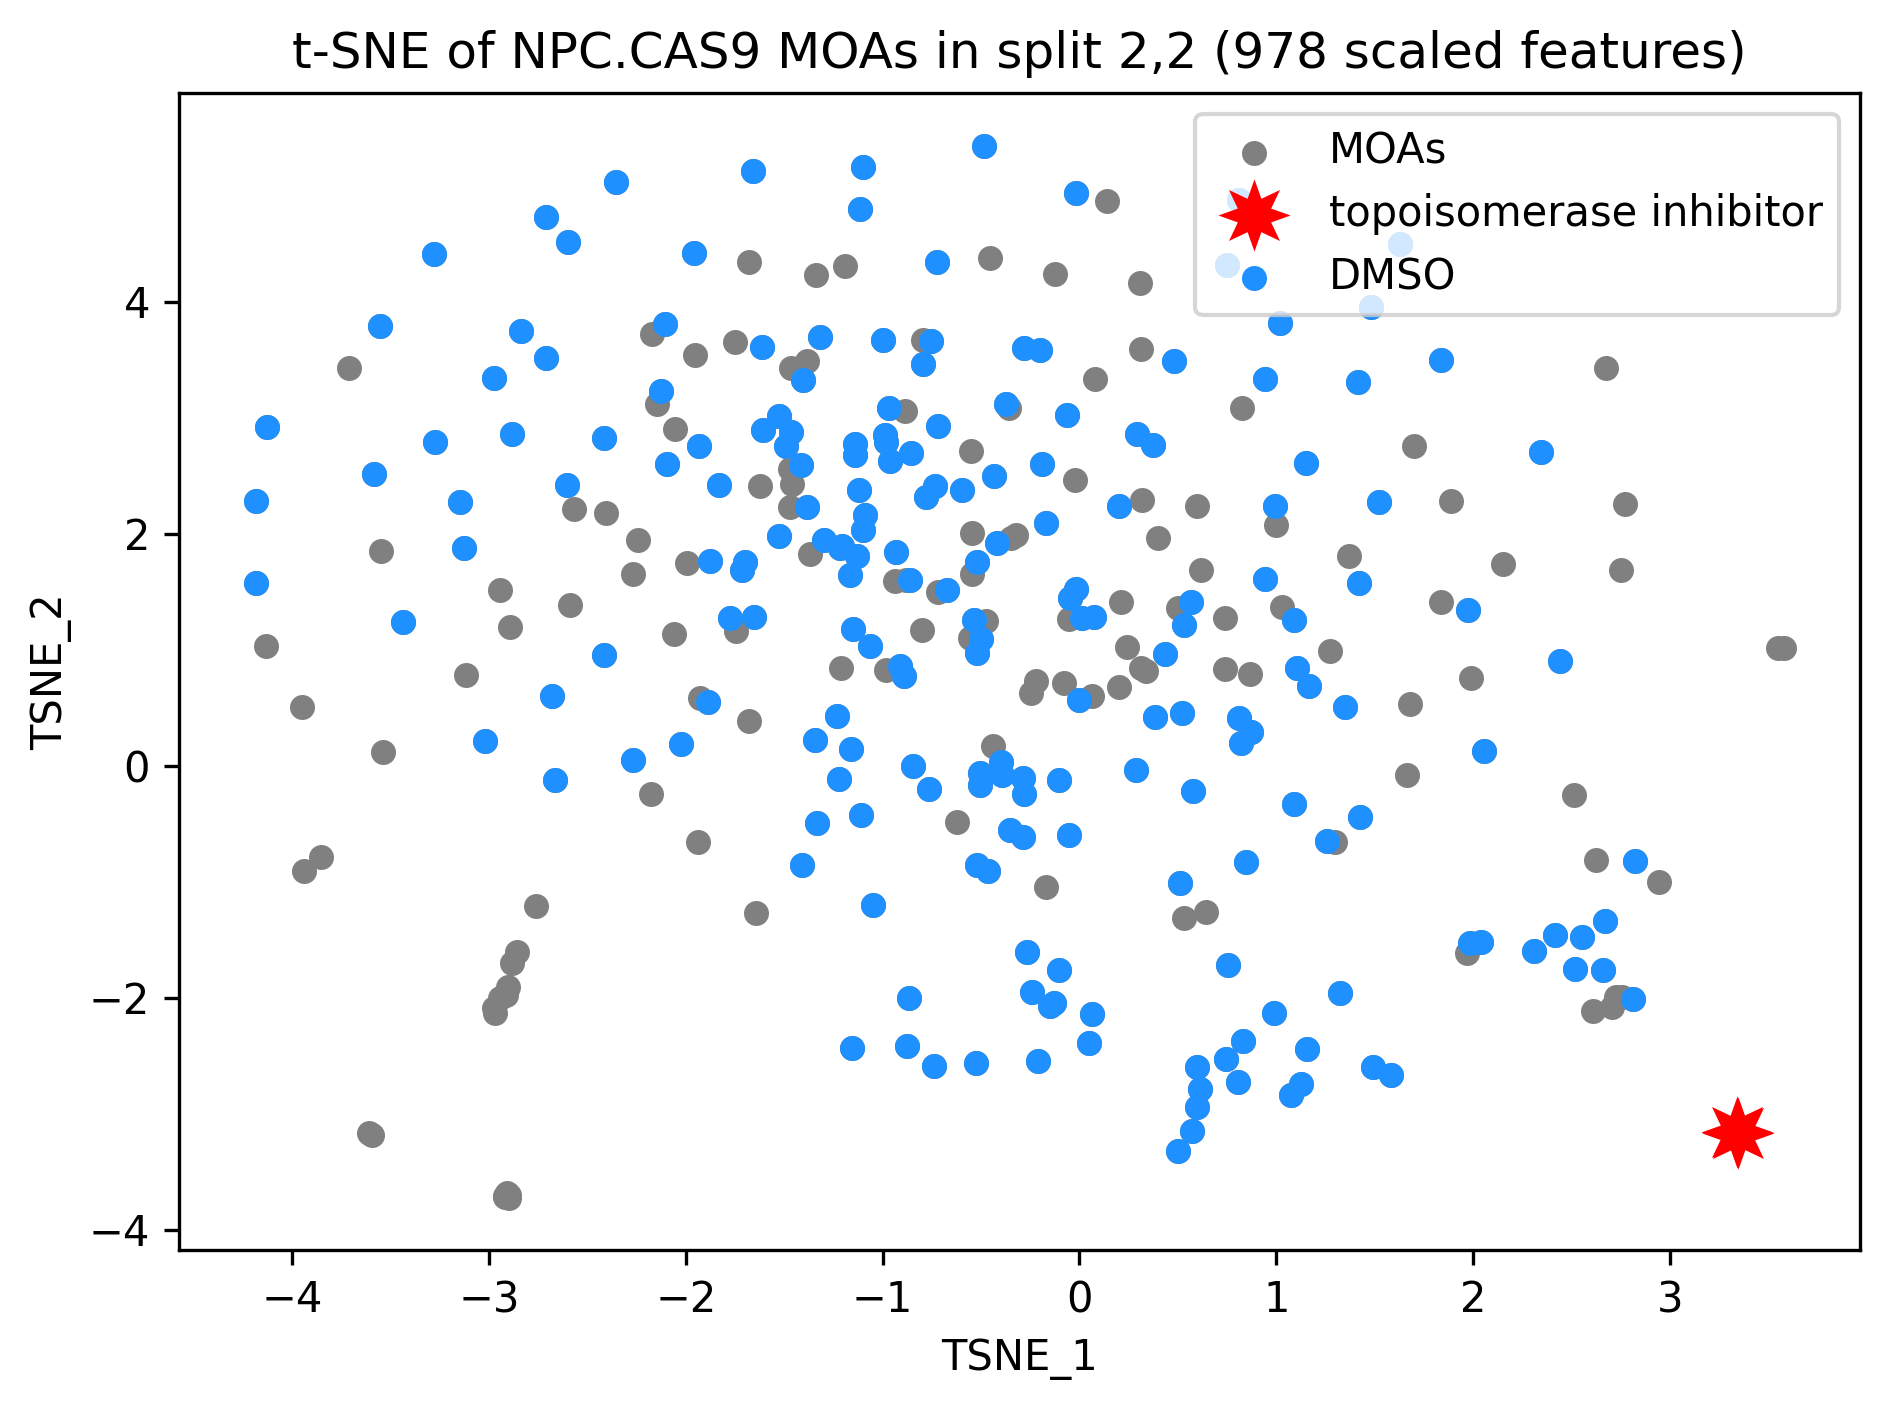

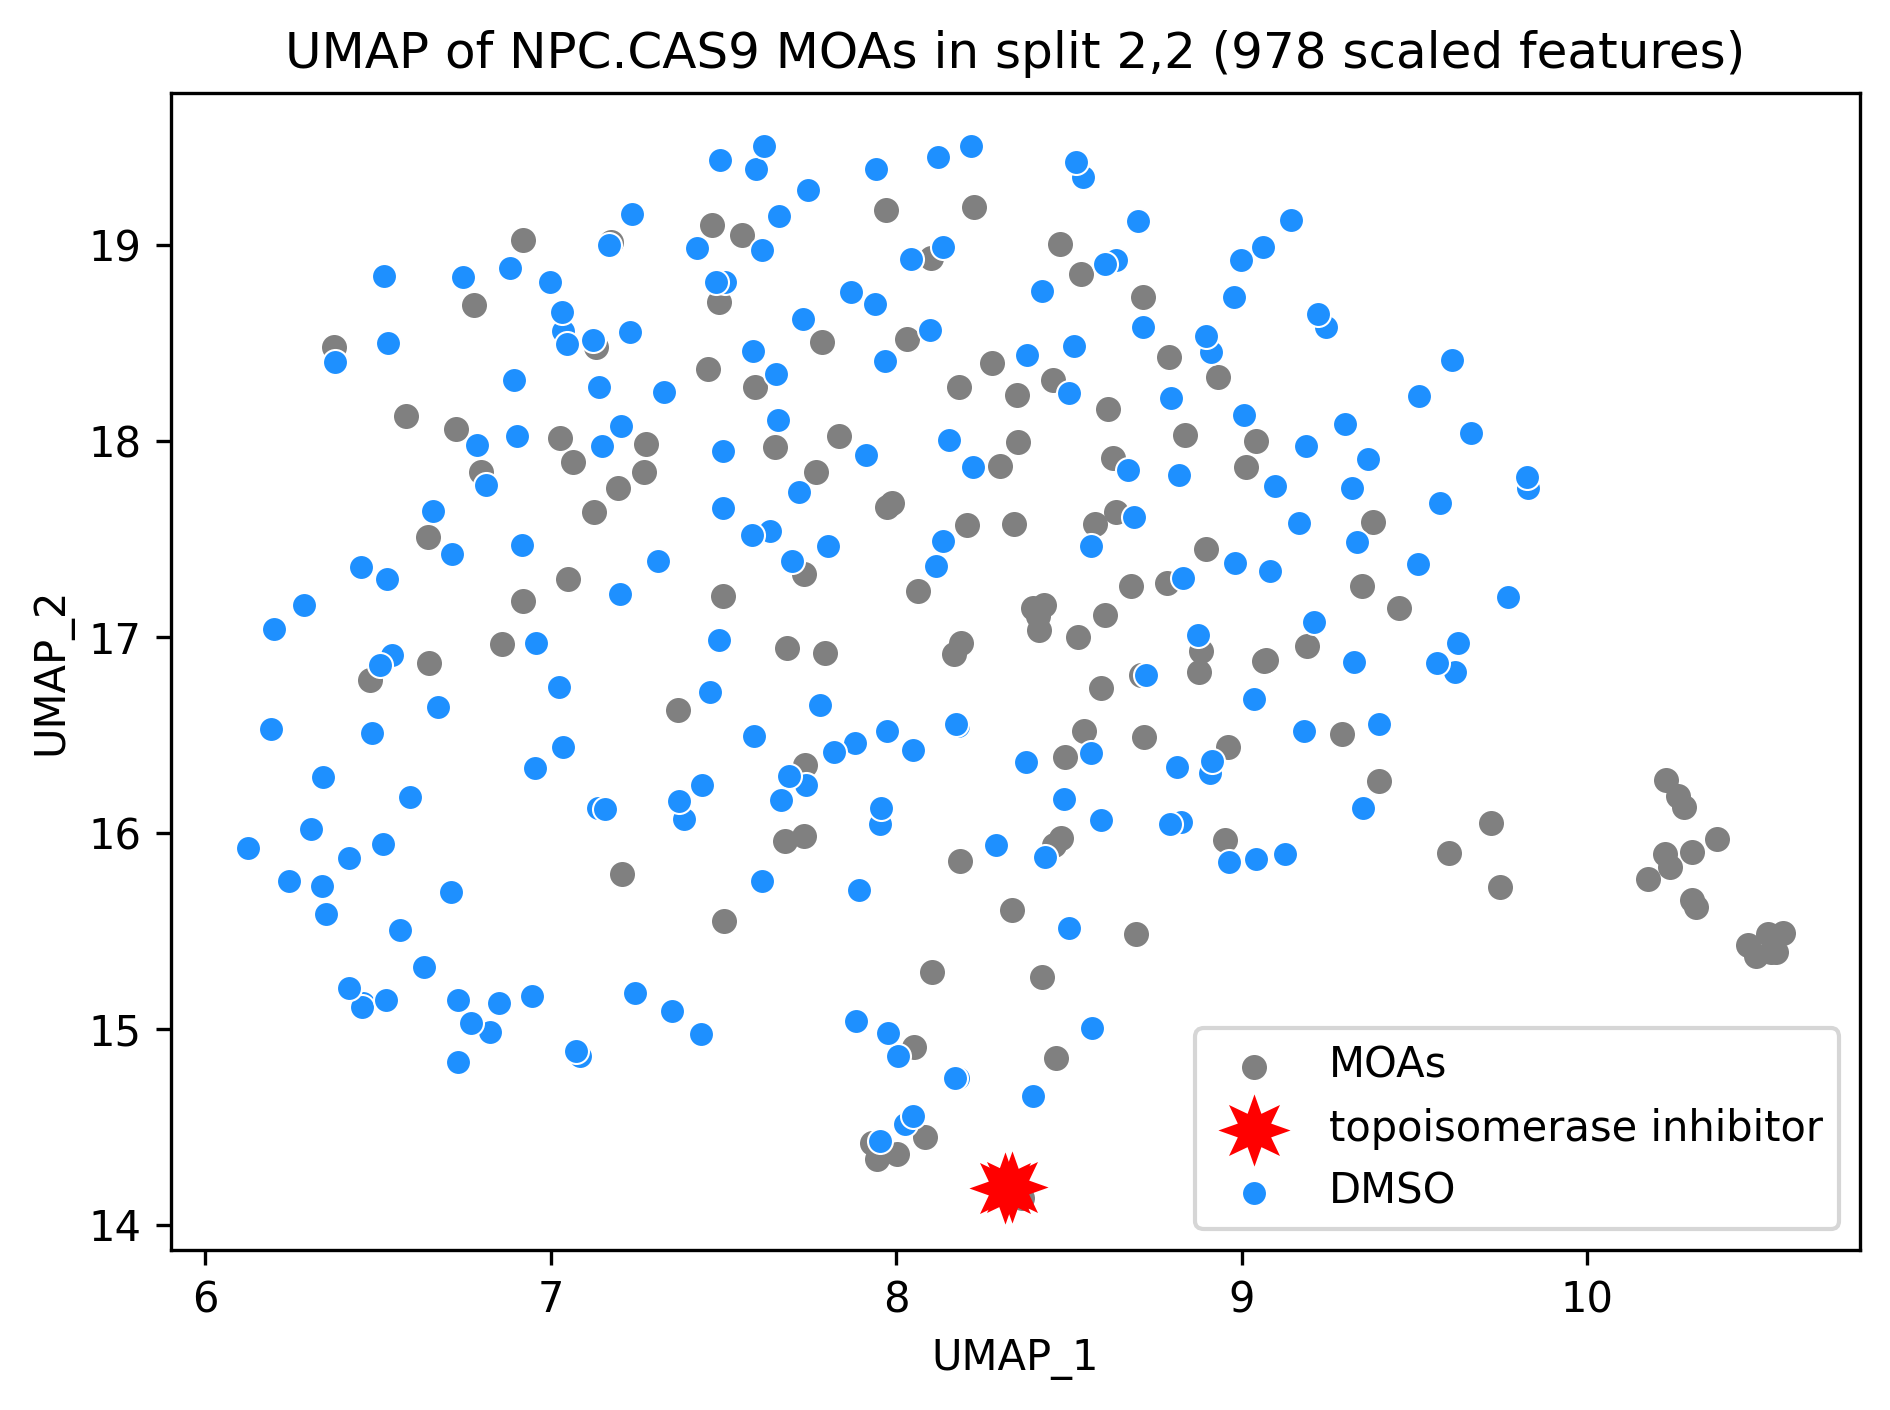

Loading fitted standard scaler and PCA found in split json dir (working_dir/split_data/stdscaler_and_pca.pkl)


/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


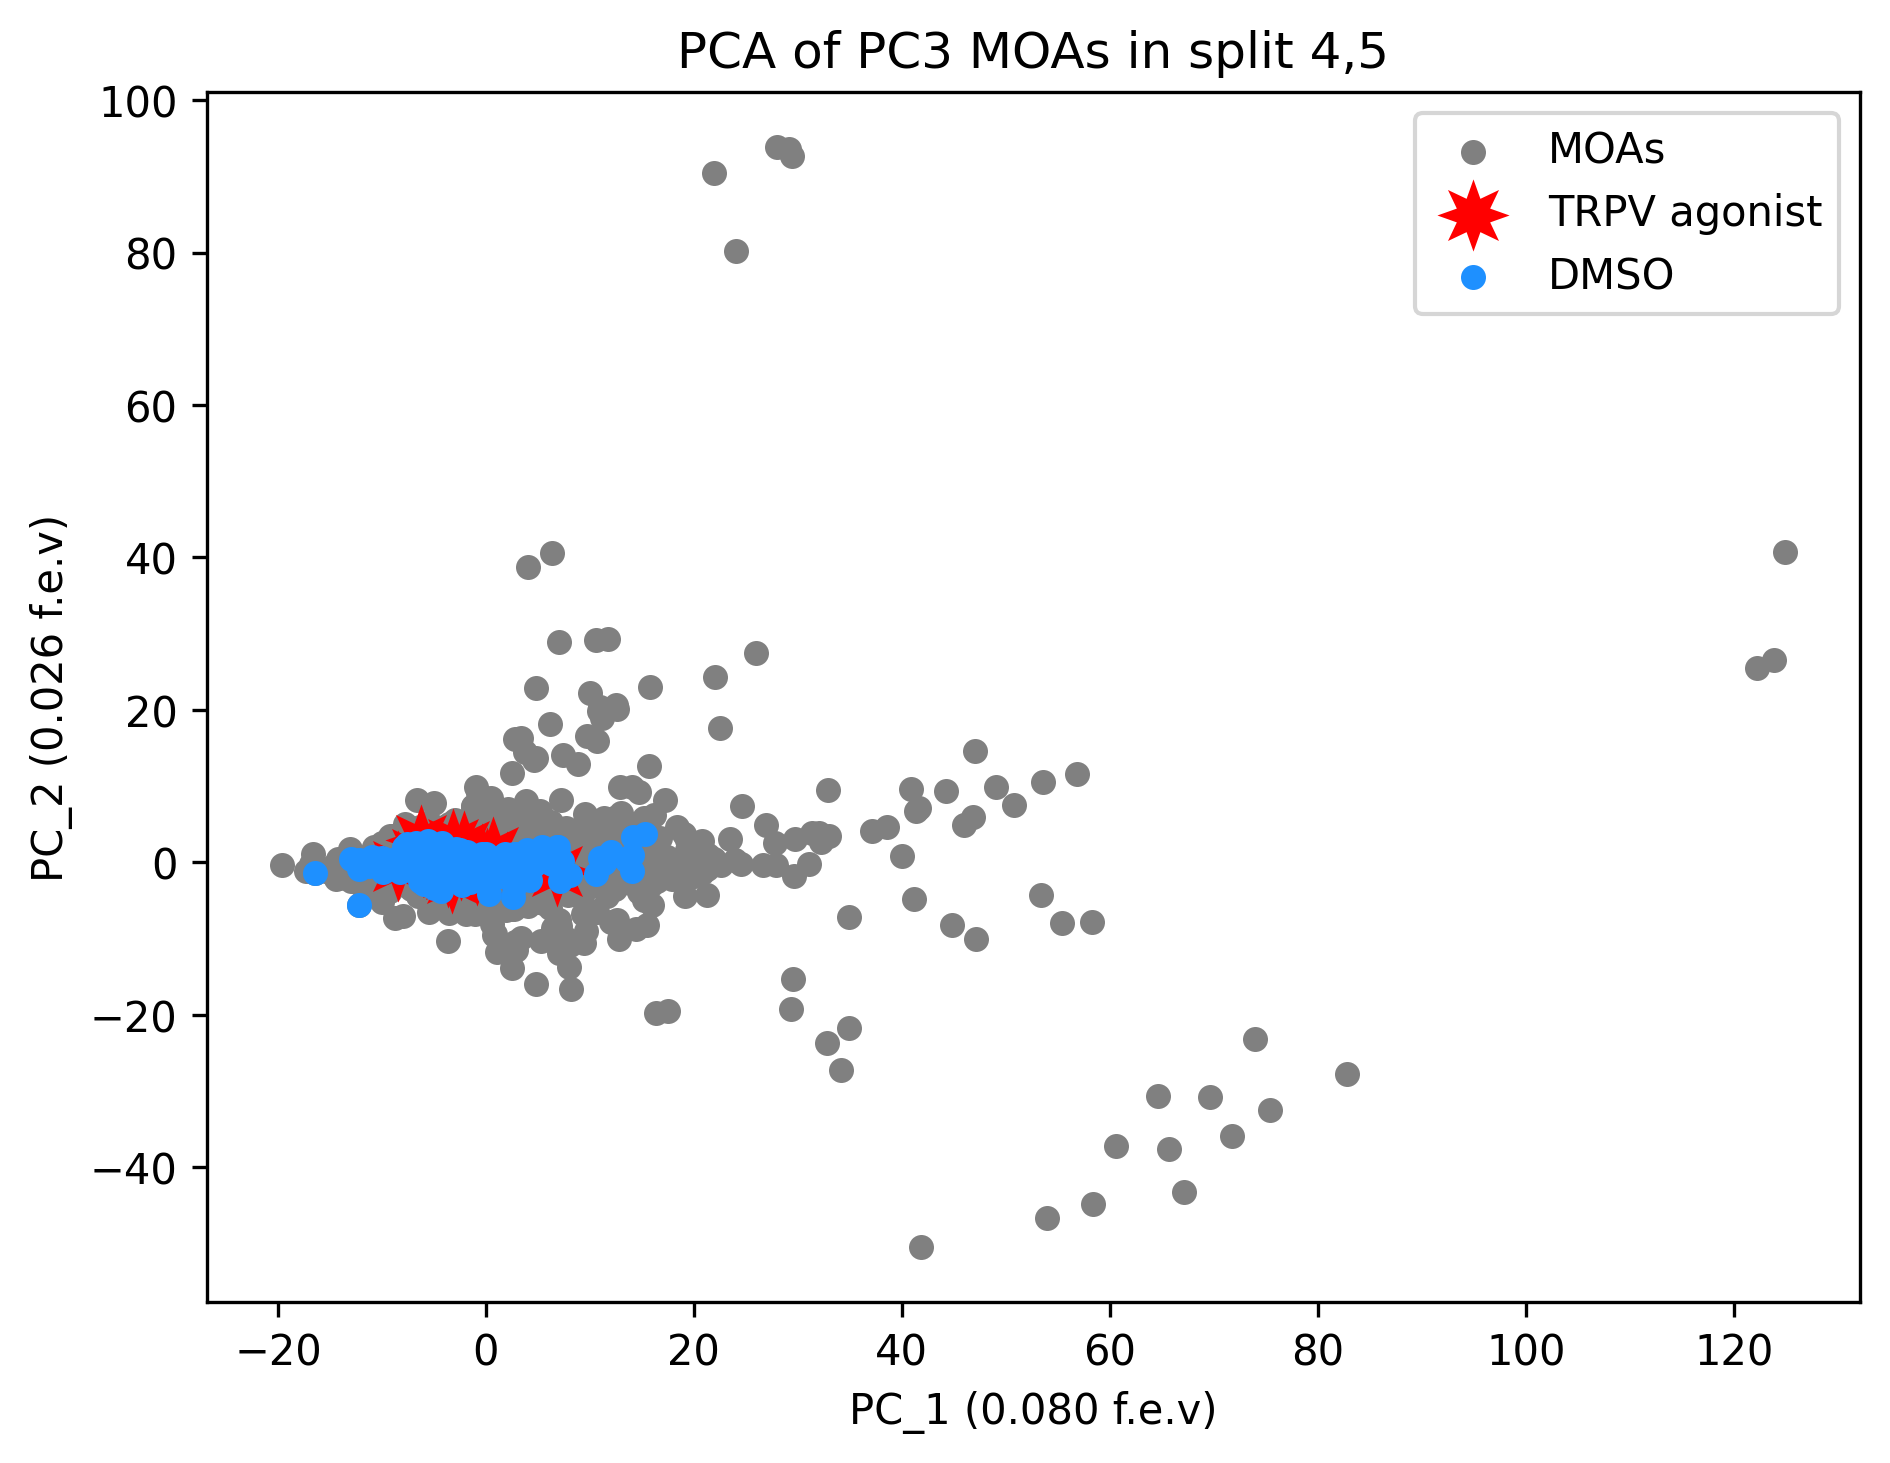

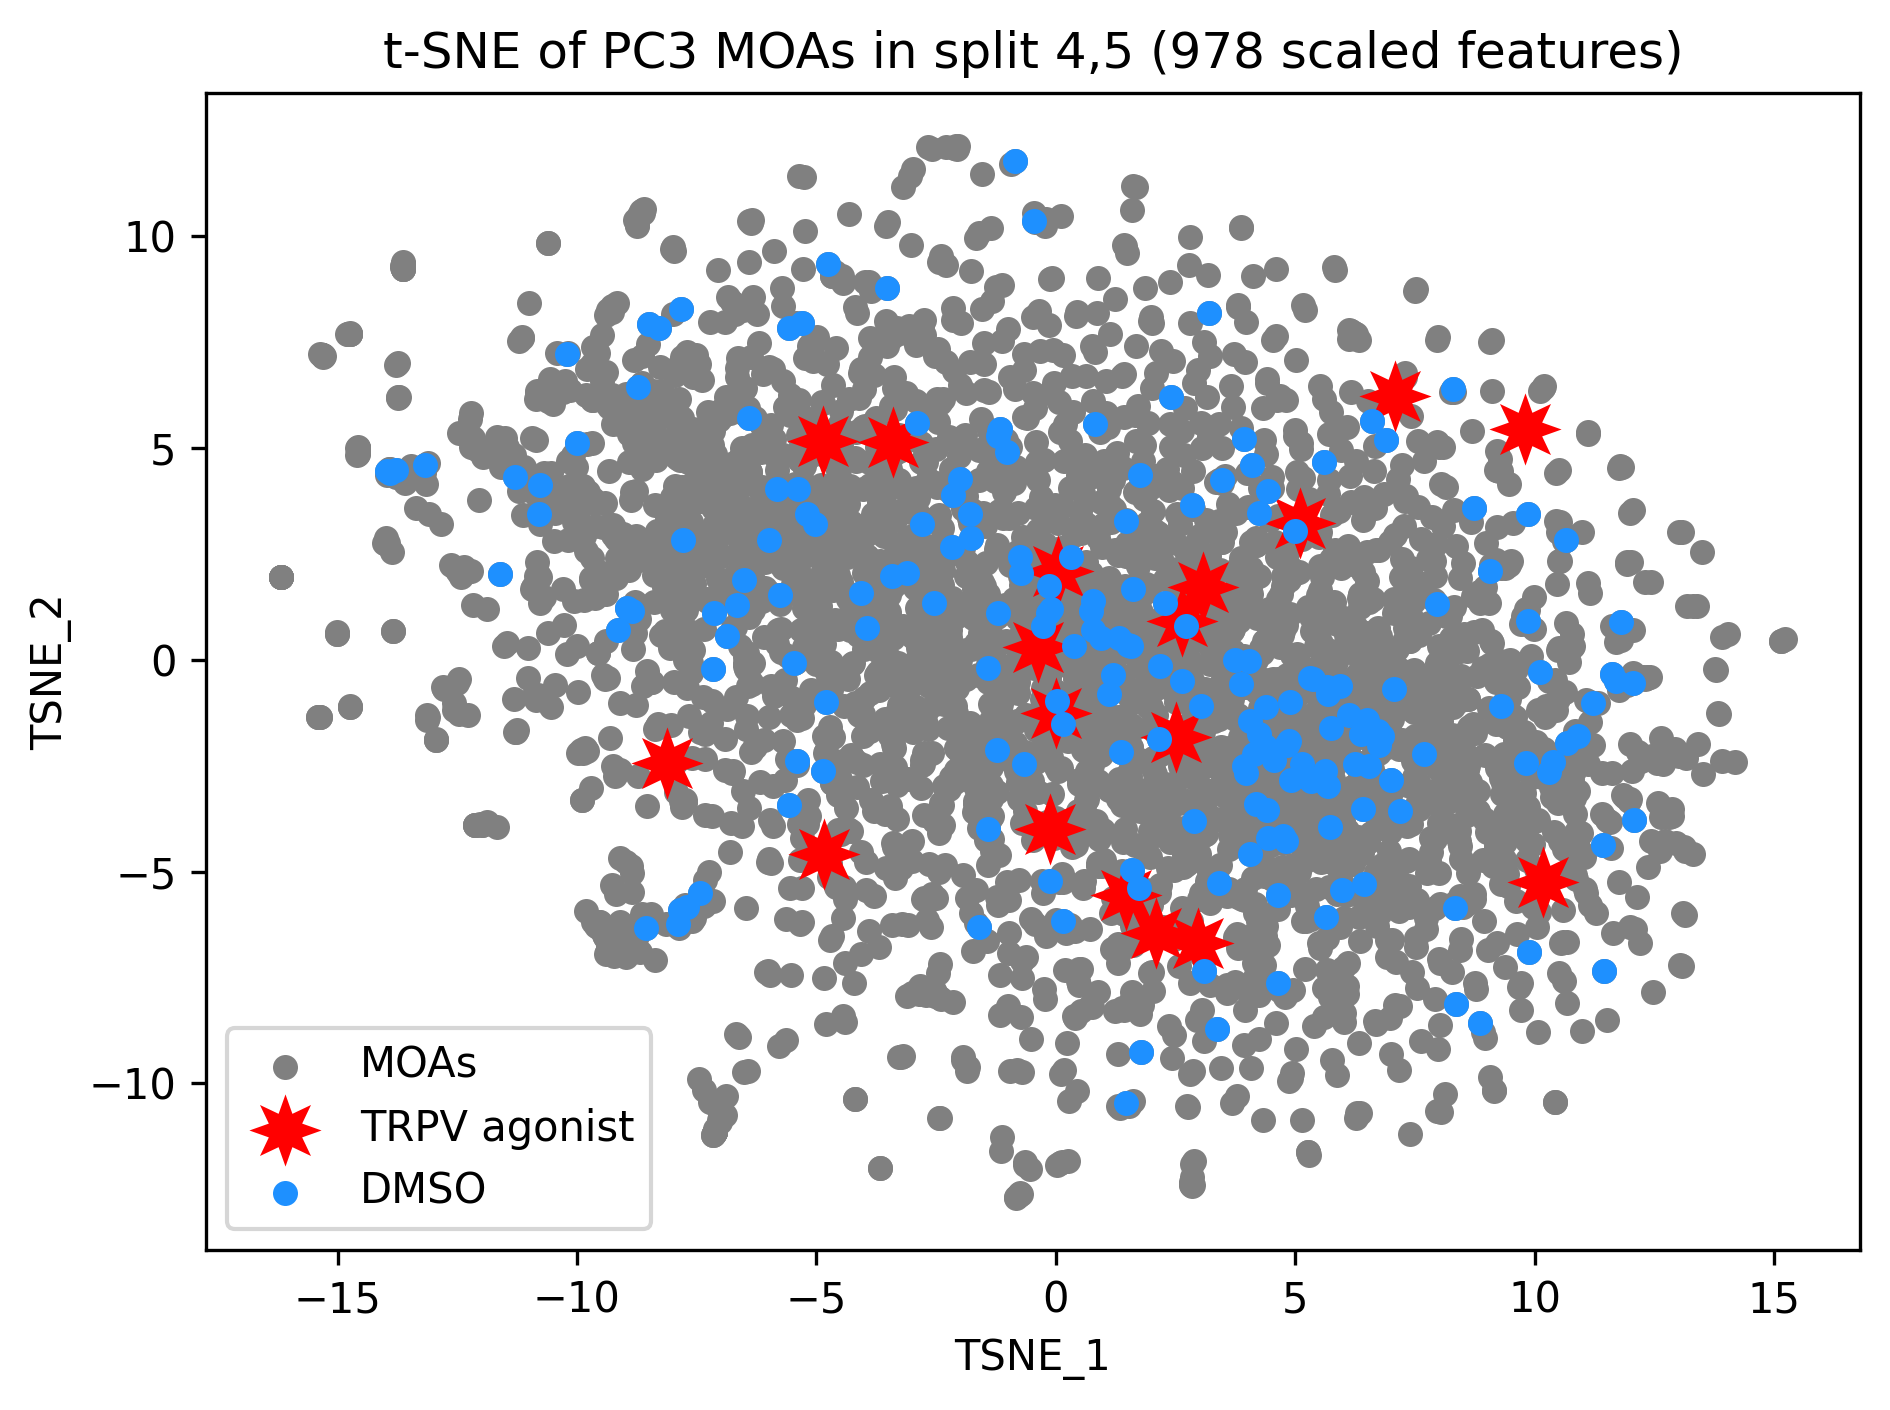

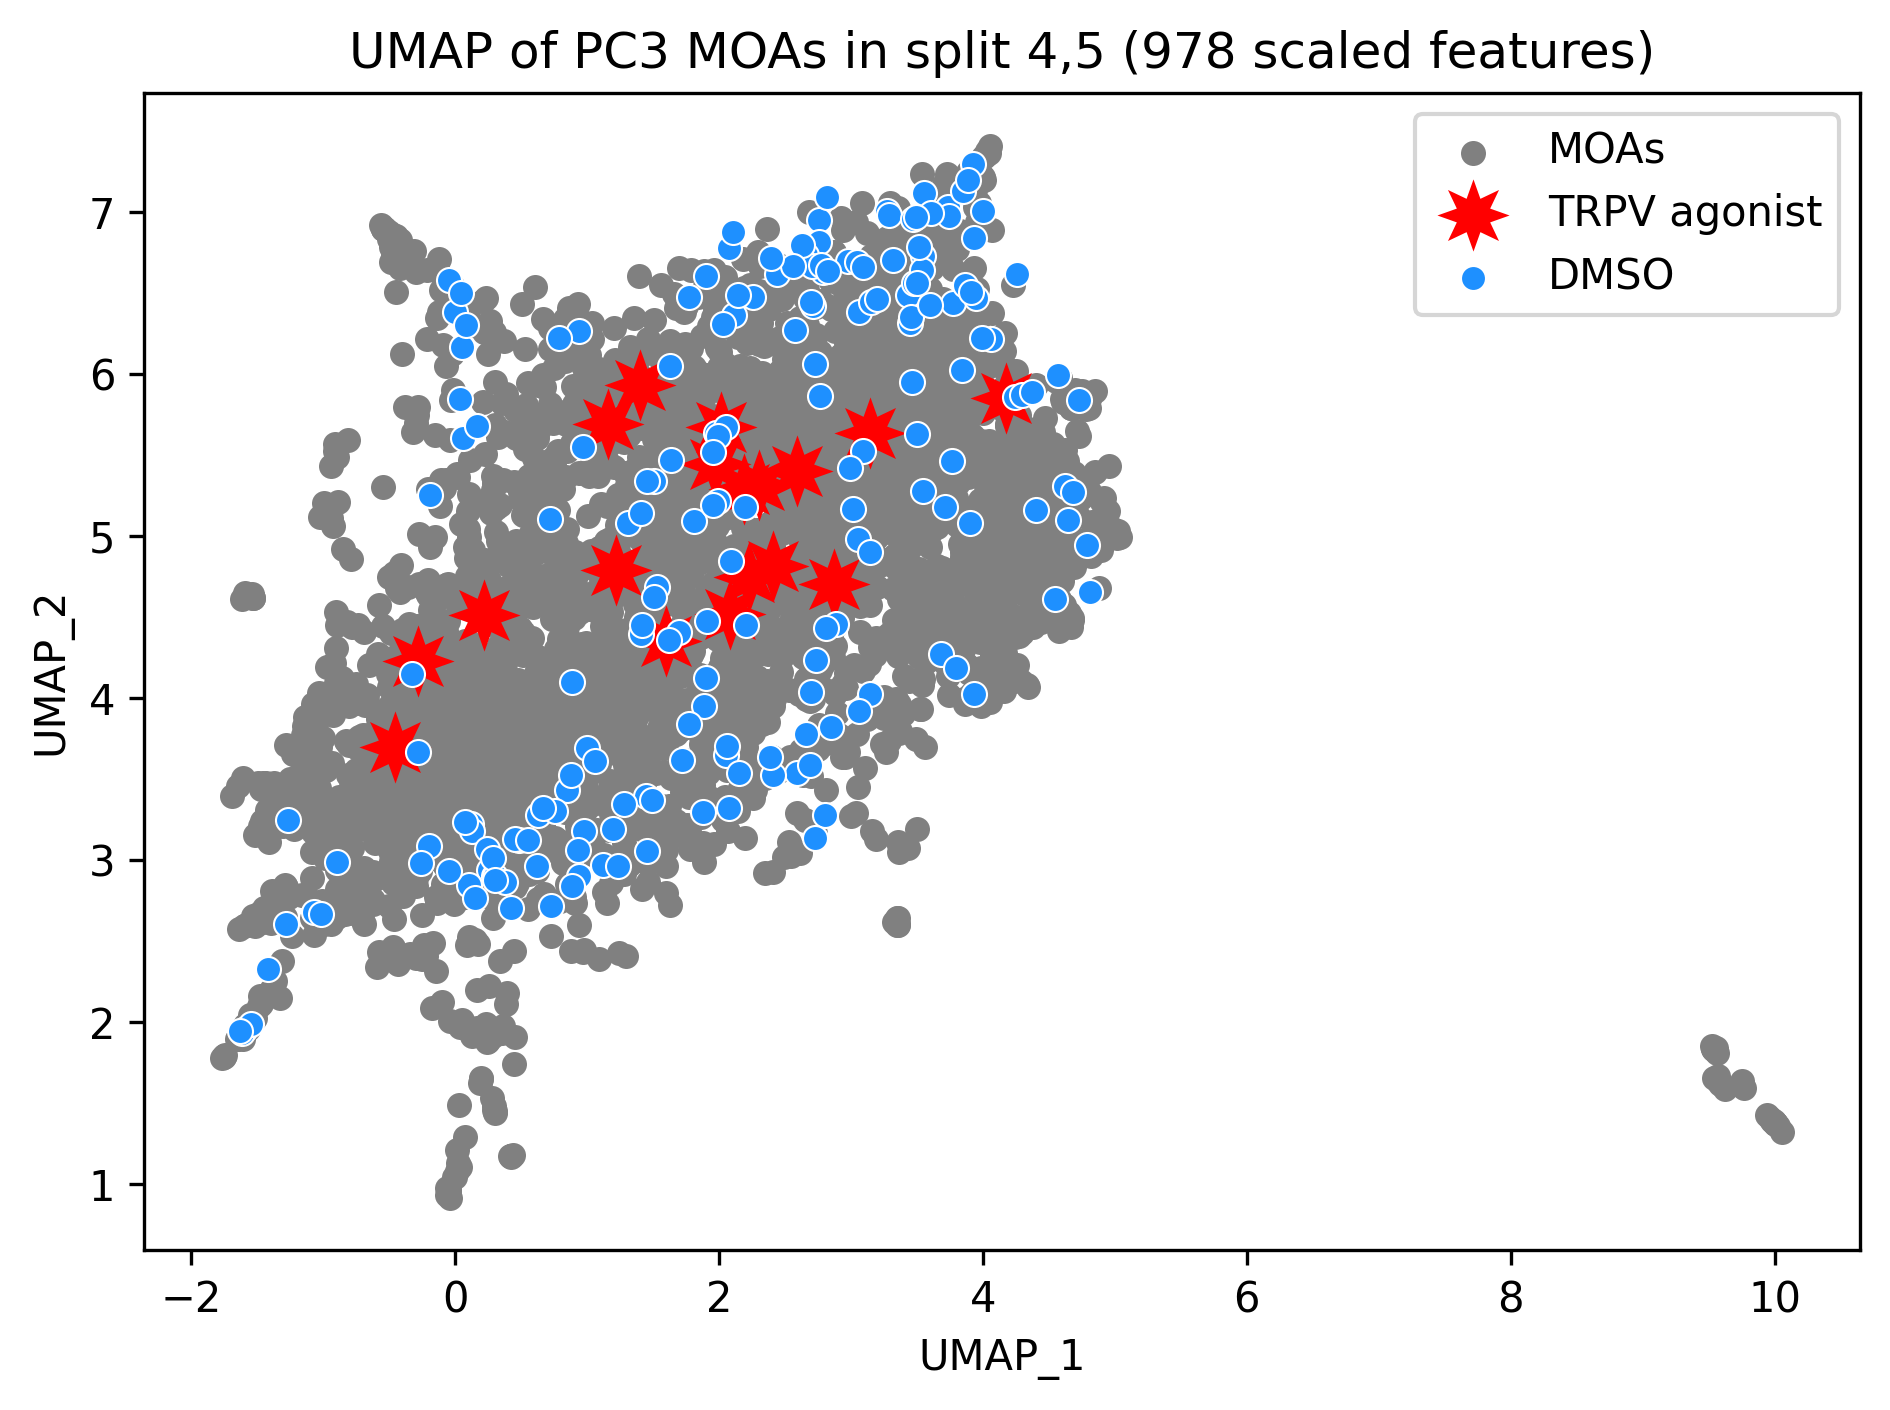

In [8]:
from leakproofcmap.phenonaut_functions import get_cmap_phenonaut_object
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from leakproofcmap import CMAPSplit
import numpy as np

np_rng=np.random.default_rng(42)

working_dir = Path("working_dir")
eval_data_dir = (
    working_dir / Path("plot_data") / Path(MODEL_NAME) / Path(MODEL_IDENTIFIER)
)
output_dir = (
    eval_data_dir / Path("compactness_vs_distinctness_vs_uniqueness")
)

phe = get_cmap_phenonaut_object(
    Path("/local_scratch/data/phenonaut_datasets/"),
    working_dir=working_dir,
    pickle_dir=Path("pickles"),
)

scaled_features = [f"scaled_{f}" for f in phe.ds.features]

for interesting_treatment in [row_lu_hc, row_hu_hc, row_hu_lc, row_lu_lc]:
    cmap_split_object = CMAPSplit.load(
    working_dir
    / Path("split_data")
    / Path(f"cmap_split_cellidsplit{interesting_treatment['cell line split']}_moasplit{interesting_treatment['moa split']}.json")
    )
    treatment_df, pca_features = cmap_split_object.get_df(
        phe.df, phe.ds.features, scale=False, pca=False, tvt_type="test"
    )
    treatment_df = treatment_df.query(f"cell_id=='{interesting_treatment['Cell line']}'")
    cmap_split_object.merge_all_data_into_train()

    treatment_df = pd.concat(
        [
            treatment_df,
            cmap_split_object.get_df(
                phe.ds.df, phe.ds.features, scale=False, pca=False, tvt_type="train"
            )[0].query(f"cell_id=='{interesting_treatment['Cell line']}' and pert_id=='DMSO'"),
        ]
    )
    
    
    # PCA
    treatment_df, _ = apply_transformer(
        StandardScaler, {}, treatment_df, phe.ds.features, scaled_features
    )
    treatment_df, PCA_features = apply_transformer(
        PCA, {"n_components": 2}, treatment_df, scaled_features, "PC"
    )
    treatment_df, TSNE_features = apply_transformer(
        TSNE, {"random_state": np_rng.integers(1)}, treatment_df, scaled_features, "TSNE"
    )
    treatment_df, UMAP_features = apply_transformer(
        UMAP, {"random_state": np_rng.integers(1)}, treatment_df, scaled_features, "UMAP"
    )

    treatment_df[['moa']+PCA_features+TSNE_features+UMAP_features].to_csv(output_dir/f"plot_data_{interesting_treatment['Cell line']}_cls{interesting_treatment['cell line split']}moas{interesting_treatment['moa split']}.csv")

    # Plot PCA
    fig, ax = plt.subplots(1, figsize=(6.4, 4.8), dpi=300)

    sns.scatterplot(
        treatment_df.query(f"moa!='{interesting_treatment['TreatmentMOA']}'"),
        x=PCA_features[0],
        y=PCA_features[1],
        c="grey",
        label="MOAs",
        linewidth=0,
        ax=ax,
    )
    sns.scatterplot(
        treatment_df.query(f"moa=='{interesting_treatment['TreatmentMOA']}'"),
        x=PCA_features[0],
        y=PCA_features[1],
        marker=(8, 1, 0),
        c="red",
        ax=ax,
        s=300,
        linewidth=0,
        label=interesting_treatment['TreatmentMOA'],
    )
    sns.scatterplot(
        treatment_df.query(f"moa=='control vehicle'"),
        x=PCA_features[0],
        y=PCA_features[1],
        marker="o",
        c="dodgerblue",
        ax=ax,
        linewidth=0,
        label="DMSO",
    )
    
    plt.tight_layout()
    ax.set_title(
        f"PCA of {interesting_treatment['Cell line']} MOAs in split {interesting_treatment['cell line split']},{interesting_treatment['moa split']}"
    )
    plt.savefig(output_dir/f"plot_pca_uniq_vs_cpct_{interesting_treatment['Cell line']}_{interesting_treatment['TreatmentMOA'].replace(' ','')}.png", dpi=300)
    plt.savefig(output_dir/f"plot_pca_uniq_vs_cpct_{interesting_treatment['Cell line']}_{interesting_treatment['TreatmentMOA'].replace(' ','')}.svg")
    plt.show()

    plt.close()


    # Plot tSNE
    fig, ax = plt.subplots(1, figsize=(6.4, 4.8), dpi=300)
    
    sns.scatterplot(
        treatment_df.query(f"moa!='{interesting_treatment['TreatmentMOA']}'"),
        x=TSNE_features[0],
        y=TSNE_features[1],
        c="grey",
        label="MOAs",
        linewidth=0,
        ax=ax,
    )
    sns.scatterplot(
        treatment_df.query(f"moa=='{interesting_treatment['TreatmentMOA']}'"),
        x=TSNE_features[0],
        y=TSNE_features[1],
        marker=(8, 1, 0),
        c="red",
        linewidth=0,
        s=300,
        ax=ax,
        label=interesting_treatment['TreatmentMOA'],
    )
    sns.scatterplot(
        treatment_df.query(f"moa=='control vehicle'"),
        x=TSNE_features[0],
        y=TSNE_features[1],
        marker="o",
        c="dodgerblue",
        ax=ax,
        linewidth=0,
        label="DMSO",
    )
    
    ax.set_title(
        f"t-SNE of {interesting_treatment['Cell line']} MOAs in split {interesting_treatment['cell line split']},{interesting_treatment['moa split']} (978 scaled features)"
    )
    plt.tight_layout()
    plt.savefig(output_dir/f"plot_tsne_uniq_vs_cpct_{interesting_treatment['Cell line']}_{interesting_treatment['TreatmentMOA'].replace(' ','')}.png", dpi=300)
    plt.savefig(output_dir/f"plot_tsne_uniq_vs_cpct_{interesting_treatment['Cell line']}_{interesting_treatment['TreatmentMOA'].replace(' ','')}.svg")
    
    plt.show()


    # Plot UMAP

    # umapped_mean_interesting_treatment_df=pd.concat([mean_interesting_treatment_df.reset_index(), pd.DataFrame(data=transformer.transform(mean_interesting_treatment_df[pca_features]), columns=['UMAP_1', 'UMAP_2'])], axis=1)
    fig, ax = plt.subplots(1, figsize=(6.4, 4.8), dpi=300)
    
    sns.scatterplot(
        treatment_df.query(f"moa!='{interesting_treatment['TreatmentMOA']}'"),
        x=UMAP_features[0],
        y=UMAP_features[1],
        c="grey",
        linewidth=0,
        label="MOAs",
        ax=ax,
    )
    sns.scatterplot(
        treatment_df.query(f"moa=='{interesting_treatment['TreatmentMOA']}'"),
        x=UMAP_features[0],
        y=UMAP_features[1],
        marker=(8, 1, 0),
        c="red",
        linewidth=0,
        s=300,
        ax=ax,
        label=interesting_treatment['TreatmentMOA'],
    )
    sns.scatterplot(
        treatment_df.query(f"moa=='control vehicle'"),
        x=UMAP_features[0],
        y=UMAP_features[1],
        marker="o",
        linewidth=0.5,
        c="dodgerblue",
        ax=ax,
        label="DMSO",
    )
    
    ax.set_title(
        f"UMAP of {interesting_treatment['Cell line']} MOAs in split {interesting_treatment['cell line split']},{interesting_treatment['moa split']} (978 scaled features)"
    )

    plt.tight_layout()
    plt.savefig(output_dir/f"plot_umap_uniq_vs_cpct_{interesting_treatment['Cell line']}_{interesting_treatment['TreatmentMOA'].replace(' ','')}.png", dpi=300)
    plt.savefig(output_dir/f"plot_umap_uniq_vs_cpct_{interesting_treatment['Cell line']}_{interesting_treatment['TreatmentMOA'].replace(' ','')}.svg")
    
    plt.show()